Fidelity with cos^{2m}(H): 0.9965955432414706
lambda_0 is -1.3697365687593873e-15


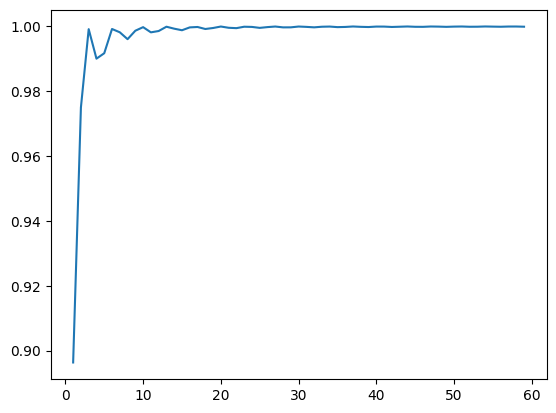

In [1]:
import numpy as np
from scipy.linalg import expm
import matplotlib.pyplot as plt



def get_ground_state(H):
    eigvals, eigvecs = np.linalg.eigh(H)
    return eigvecs[:, np.argmin(eigvals)]

def shift_and_normalize_H(H):
    eigvals = np.linalg.eigvalsh(H)
    λ_min, λ_max = np.min(eigvals), np.max(eigvals)
    H_norm = (H - λ_min * np.eye(len(H))) / (λ_max - λ_min)
    λ0 = np.min(np.linalg.eigvalsh(H_norm))
    H_shifted = H_norm - λ0 * np.eye(len(H))
    return H_shifted

def shift_and_normalize_H1(H):
    eigvals = np.linalg.eigvalsh(H)
    λ_min, λ_max = np.min(eigvals), np.max(eigvals)
    H_norm = (H - λ_min * np.eye(len(H))) / (λ_max - λ_min) * np.pi
    λ0 = np.min(np.linalg.eigvalsh(H_norm))
    print('lambda_0 is', λ0)
    H_shifted = H_norm - λ0 * np.eye(len(H))
    return H_shifted

def cosine_filter_matrix(H, m):
    """Computes cos^{2m}(H) via (cos H)^{2m}"""
    U = expm(1j * H)
    U_dag = expm(-1j * H)
    cosH = 0.5 * (U + U_dag)
    return np.linalg.matrix_power(cosH, 2 * m)

def custom_filter_matrix(H, N):
    """Computes f(H) = (1/N) sum_{j=N}^{2N} e^{-iHj}"""
    #return sum(expm(-1j * H * i) for i in range(N, 2 * N + 1)) / N
    return 1/(2*N+1)*sum(expm(-1j * H * i) for i in range(-N, N + 1))
    #return sum(expm(-1j * H * i) for i in range(N)) / N

def evaluate_fidelity(filter_matrix, init_state, ground_state):
    psi = filter_matrix @ init_state
    psi /= np.linalg.norm(psi)
    return np.abs(np.vdot(psi, ground_state)) #** 2

# ===== 示例主程序 =====
# 假设 H 已定义
dim = 2 ** 4  # 例如 4 qubits
n = 4
def kron_n(op_list):
    result = np.array([[1]])
    for op in op_list:
        result = np.kron(result, op)
    return result

# 构造 TFIM H
H = np.zeros((dim, dim), dtype=np.complex128)
Z = np.array([[1, 0], [0, -1]])
X = np.array([[0, 1], [1, 0]])
I = np.eye(2)
for i in range(n):
    Zi = [I] * n
    Zi[i] = Z
    Zi[(i + 1) % n] = Z
    H -= kron_n(Zi)
    Xi = [I] * n
    Xi[i] = X
    H -= kron_n(Xi)

H_shifted = shift_and_normalize_H(H)
ground_state = get_ground_state(H_shifted)
init_state = np.ones(dim) / np.sqrt(dim)

# Cosine filter fidelity
m = 24
cos_filter = cosine_filter_matrix(H_shifted, m)
fidelity_cos = evaluate_fidelity(cos_filter, init_state, ground_state)
print("Fidelity with cos^{2m}(H):", fidelity_cos)

# Custom filter fidelity
N = 60
H_shifted = shift_and_normalize_H1(H)
# fH = custom_filter_matrix(H, N)
# fidelity_custom = evaluate_fidelity(fH, init_state, ground_state)
# print("Fidelity with custom f(H):", fidelity_custom)
fidelity_list = []
for i in range(1, N):
    fH = custom_filter_matrix(H_shifted, i)
    fidelity_custom = evaluate_fidelity(fH, init_state, ground_state)
    fidelity_list.append(fidelity_custom)
    #print("Fidelity with custom f(H):", fidelity_custom)
plt.plot(range(1, N), fidelity_list)



In [ ]:
# Custom filter fidelity
N = 60
H_shifted = shift_and_normalize_H(H)
# fH = custom_filter_matrix(H, N)
# fidelity_custom = evaluate_fidelity(fH, init_state, ground_state)
# print("Fidelity with custom f(H):", fidelity_custom)
fidelity_list = []
for i in range(1, N):
    fH = custom_filter_matrix(H_shifted, i)
    fidelity_custom = evaluate_fidelity(fH, init_state, ground_state)
    fidelity_list.append(fidelity_custom)
    #print("Fidelity with custom f(H):", fidelity_custom)
plt.plot(range(1, N), fidelity_list)

In [6]:
import numpy as np
from scipy.linalg import expm
import matplotlib.pyplot as plt



def get_ground_state(H):
    eigvals, eigvecs = np.linalg.eigh(H)
    return eigvecs[:, np.argmin(eigvals)]

def shift_and_normalize_H(H):
    eigvals = np.linalg.eigvalsh(H)
    λ_min, λ_max = np.min(eigvals), np.max(eigvals)
    H_norm = (H - λ_min * np.eye(len(H))) / (λ_max - λ_min)
    λ0 = np.min(np.linalg.eigvalsh(H_norm))
    H_shifted = H_norm - λ0 * np.eye(len(H))
    return H_shifted

def cosine_filter_matrix(H, M):
    """Computes cos^{2m}(H) via (cos H)^{2m}"""
    U = expm(1j * H)
    U_dag = expm(-1j * H)
    cosH = 0.5 * (U + U_dag)
    return np.linalg.matrix_power(cosH, M)

def custom_filter_matrix(H, N):
    """Computes f(H) = (1/N) sum_{j=N}^{2N} e^{-iHj}"""
    #return sum(expm(-1j * H * i) for i in range(N, 2 * N + 1)) / N
    return 1/(2*N+1)*sum(expm(-1j * H * i) for i in range(-N, N + 1))
    #return sum(expm(-1j * H * i) for i in range(N)) / N

def evaluate_fidelity(filter_matrix, init_state, ground_state):
    psi = filter_matrix @ init_state
    psi /= np.linalg.norm(psi)
    return np.abs(np.vdot(psi, ground_state)) #** 2
    #return np.linalg.norm(psi-ground_state)#**2

# ===== 示例主程序 =====
# 假设 H 已定义
n = 6
dim = 2 ** n  # 例如 4 qubits

def kron_n(op_list):
    result = np.array([[1]])
    for op in op_list:
        result = np.kron(result, op)
    return result

# 构造 TFIM H
H = np.zeros((dim, dim), dtype=np.complex128)
Z = np.array([[1, 0], [0, -1]])
X = np.array([[0, 1], [1, 0]])
I = np.eye(2)
for i in range(n):
    Zi = [I] * n
    Zi[i] = Z
    Zi[(i + 1) % n] = Z
    H -= kron_n(Zi)
    Xi = [I] * n
    Xi[i] = X
    H -= kron_n(Xi)

H_shifted = shift_and_normalize_H(H)
ground_state = get_ground_state(H_shifted)
init_state = np.ones(dim) / np.sqrt(dim)

# Cosine filter fidelity
M = 300
cos_filter = cosine_filter_matrix(H_shifted, M)
fidelity_cos = evaluate_fidelity(cos_filter, init_state, ground_state)
print("Euclidean distance with cos^{M}(H):", fidelity_cos)

# Custom filter fidelity
N = 30
H_shifted = shift_and_normalize_H1(H)
fH = custom_filter_matrix(H_shifted, N)
fidelity_custom = evaluate_fidelity(fH, init_state, ground_state)
print("Euclidean distance with custom f(H):", fidelity_custom)
# fidelity_list = []
# for i in range(1, N):
#     fH = custom_filter_matrix(H_shifted, i)
#     fidelity_custom = evaluate_fidelity(fH, init_state, ground_state)
#     fidelity_list.append(fidelity_custom)
#     #print("Fidelity with custom f(H):", fidelity_custom)
# plt.plot(range(1, N), fidelity_list)



Euclidean distance with cos^{M}(H): 0.9986742352197522
Euclidean distance with custom f(H): 0.9998333433573411


In [10]:
np.linalg.eigh(H_shifted)[0]

array([1.79617117e-16, 5.35235869e-02, 4.20893607e-01, 4.60075592e-01,
       4.60075592e-01, 7.57692316e-01, 7.57692316e-01, 7.85398163e-01,
       7.85398163e-01, 7.85398163e-01, 7.85398163e-01, 8.66627598e-01,
       8.66627598e-01, 9.95844967e-01, 9.95844967e-01, 9.95844967e-01,
       9.95844967e-01, 1.14990272e+00, 1.16424432e+00, 1.16424432e+00,
       1.16424432e+00, 1.16424432e+00, 1.27317960e+00, 1.27317960e+00,
       1.36034952e+00, 1.36034952e+00, 1.36034952e+00, 1.36034952e+00,
       1.46186105e+00, 1.57079633e+00, 1.57079633e+00, 1.57079633e+00,
       1.57079633e+00, 1.57079633e+00, 1.57079633e+00, 1.67973161e+00,
       1.78124313e+00, 1.78124313e+00, 1.78124313e+00, 1.78124313e+00,
       1.86841305e+00, 1.86841305e+00, 1.97734833e+00, 1.97734833e+00,
       1.97734833e+00, 1.97734833e+00, 1.99168993e+00, 2.14574769e+00,
       2.14574769e+00, 2.14574769e+00, 2.14574769e+00, 2.27496506e+00,
       2.27496506e+00, 2.35619449e+00, 2.35619449e+00, 2.35619449e+00,
      

In [35]:
# ===== 示例主程序 =====
# 假设 H 已定义
n = 8
dim = 2 ** n  # 例如 4 qubits

def kron_n(op_list):
    result = np.array([[1]])
    for op in op_list:
        result = np.kron(result, op)
    return result

# 构造 TFIM H
H = np.zeros((dim, dim), dtype=np.complex128)
Z = np.array([[1, 0], [0, -1]])
X = np.array([[0, 1], [1, 0]])
I = np.eye(2)
for i in range(n):
    Zi = [I] * n
    Zi[i] = Z
    Zi[(i + 1) % n] = Z
    H -= kron_n(Zi)
    Xi = [I] * n
    Xi[i] = X
    H -= kron_n(Xi)

H_shifted = shift_and_normalize_H(H)
ground_state = get_ground_state(H_shifted)
init_state = np.ones(dim) / np.sqrt(dim)

# Cosine filter fidelity
M = 200
cos_filter = cosine_filter_matrix(H_shifted, M)
fidelity_cos = evaluate_fidelity(cos_filter, init_state, ground_state)
print("Euclidean distance with cos^{M}(H):", fidelity_cos)

# Custom filter fidelity
N = 200
fH = custom_filter_matrix(H_shifted, N)
fidelity_custom = evaluate_fidelity(fH, init_state, ground_state)
print("Euclidean distance with custom f(H):", fidelity_custom)

Euclidean distance with cos^{M}(H): 0.9086546442395737
Euclidean distance with custom f(H): 0.9996790954651112


In [5]:
np.linalg.eigh(H_shifted)[0]

array([-1.82917121e-17,  3.80602337e-02,  2.92893219e-01,  3.08658284e-01,
        3.08658284e-01,  4.20743666e-01,  5.00000000e-01,  5.00000000e-01,
        5.00000000e-01,  5.00000000e-01,  5.79256334e-01,  6.91341716e-01,
        6.91341716e-01,  7.07106781e-01,  9.61939766e-01,  1.00000000e+00])

In [4]:
np.linalg.eigh(H)[0]

array([-5.22625186e+00, -4.82842712e+00, -2.16478440e+00, -2.00000000e+00,
       -2.00000000e+00, -8.28427125e-01, -5.84343686e-16, -2.60721966e-16,
        3.21107000e-16,  5.65592016e-16,  8.28427125e-01,  2.00000000e+00,
        2.00000000e+00,  2.16478440e+00,  4.82842712e+00,  5.22625186e+00])

In [27]:
# 假设 H 已定义
n = 6
dim = 2 ** n  # 例如 4 qubits

def kron_n(op_list):
    result = np.array([[1]])
    for op in op_list:
        result = np.kron(result, op)
    return result

# 构造 TFIM H
H = np.zeros((dim, dim), dtype=np.complex128)
Z = np.array([[1, 0], [0, -1]])
X = np.array([[0, 1], [1, 0]])
I = np.eye(2)
for i in range(n):
    Zi = [I] * n
    Zi[i] = Z
    Zi[(i + 1) % n] = Z
    H -= kron_n(Zi)
    Xi = [I] * n
    Xi[i] = X
    H -= kron_n(Xi)

#H_shifted = shift_and_normalize_H(H)
#np.linalg.eigh(H_shifted)[0]
ground_state = get_ground_state(H)
init_state = np.ones(dim) / np.sqrt(dim)
np.log(1/(np.abs(np.vdot(init_state, ground_state))))

np.float64(0.31925211824948846)

In [28]:
0.319-0.43

-0.11099999999999999

In [20]:
np.linalg.eigh(H)[0]

array([-12.78490644, -12.62750303, -11.53343072, ...,  11.53343072,
        12.62750303,  12.78490644], shape=(1024,))

Euclidean distance with cos^{2m}(H): 0.002403782908364335


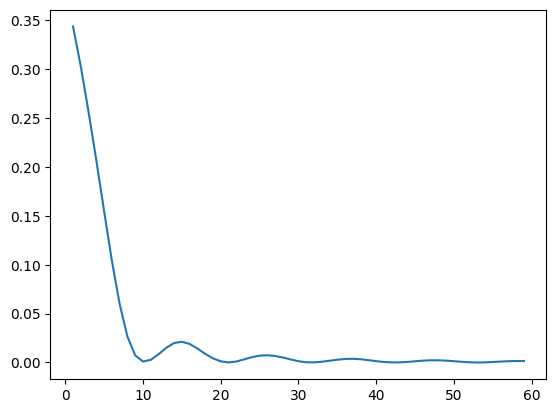

In [13]:
import numpy as np
from scipy.linalg import expm
import matplotlib.pyplot as plt



def get_ground_state(H):
    eigvals, eigvecs = np.linalg.eigh(H)
    return eigvecs[:, np.argmin(eigvals)]

def shift_and_normalize_H(H):
    eigvals = np.linalg.eigvalsh(H)
    λ_min, λ_max = np.min(eigvals), np.max(eigvals)
    H_norm = (H - λ_min * np.eye(len(H))) / (λ_max - λ_min)
    λ0 = np.min(np.linalg.eigvalsh(H_norm))
    H_shifted = H_norm - λ0 * np.eye(len(H))
    return H_shifted

def cosine_filter_matrix(H, m):
    """Computes cos^{2m}(H) via (cos H)^{2m}"""
    U = expm(1j * H)
    U_dag = expm(-1j * H)
    cosH = 0.5 * (U + U_dag)
    return np.linalg.matrix_power(cosH, 2 * m)

def custom_filter_matrix(H, N):
    """Computes f(H) = (1/N) sum_{j=N}^{2N} e^{-iHj}"""
    #return sum(expm(-1j * H * i) for i in range(N, 2 * N + 1)) / N
    return 1/(2*N+1) * sum(expm(-1j * H * i) for i in range(-N, N + 1)) #/ N
    #return sum(expm(-1j * H * i) for i in range(N)) / N

def evaluate_fidelity(filter_matrix, init_state, ground_state):
    psi = filter_matrix @ init_state
    psi /= np.linalg.norm(psi)
    #return np.abs(np.vdot(psi, ground_state)) ** 2
    return np.linalg.norm(psi-ground_state)**2

# ===== 示例主程序 =====
# 假设 H 已定义
dim = 2 ** 4  # 例如 4 qubits
n = 4
def kron_n(op_list):
    result = np.array([[1]])
    for op in op_list:
        result = np.kron(result, op)
    return result

# 构造 TFIM H
H = np.zeros((dim, dim), dtype=np.complex128)
Z = np.array([[1, 0], [0, -1]])
X = np.array([[0, 1], [1, 0]])
I = np.eye(2)
for i in range(n):
    Zi = [I] * n
    Zi[i] = Z
    Zi[(i + 1) % n] = Z
    H -= kron_n(Zi)
    Xi = [I] * n
    Xi[i] = X
    H -= kron_n(Xi)

H_shifted = shift_and_normalize_H(H)
ground_state = get_ground_state(H_shifted)
init_state = np.ones(dim) / np.sqrt(dim)

# # Cosine filter fidelity
m = 30
cos_filter = cosine_filter_matrix(H_shifted, m)
fidelity_cos = evaluate_fidelity(cos_filter, init_state, ground_state)
print("Euclidean distance with cos^{2m}(H):", fidelity_cos)

# Custom filter fidelity
N = 60
# fH = custom_filter_matrix(H, N)
# fidelity_custom = evaluate_fidelity(fH, init_state, ground_state)
# print("Fidelity with custom f(H):", fidelity_custom)
fidelity_list = []
for i in range(1, N):
    fH = custom_filter_matrix(H_shifted, i)
    fidelity_custom = evaluate_fidelity(fH, init_state, ground_state)
    fidelity_list.append(fidelity_custom)
    #print("Fidelity with custom f(H):", fidelity_custom)
plt.plot(range(1, N), fidelity_list)






In [58]:
print(fidelity_list[10:22])

[np.float64(0.8753057163237747), np.float64(0.8986704055979552), np.float64(0.9208353854359778), np.float64(0.941161296022945), np.float64(0.9589967949087668), np.float64(0.9737442299683479), np.float64(0.9850037965321907), np.float64(0.9927169403738546), np.float64(0.9972013550090072), np.float64(0.9990391970458845), np.float64(0.9988861716868407), np.float64(0.9973169201282629)]


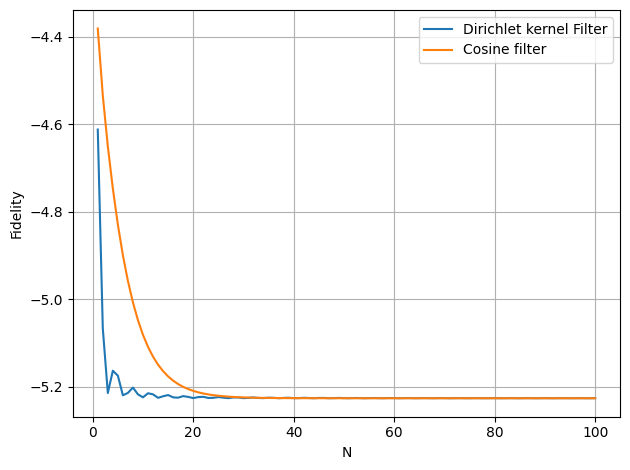

In [3]:
import numpy as np
from scipy.linalg import expm
import matplotlib.pyplot as plt

def get_ground_state(H):
    eigvals, eigvecs = np.linalg.eigh(H)
    return eigvecs[:, np.argmin(eigvals)]

def shift_and_normalize_H(H):
    eigvals = np.linalg.eigvalsh(H)
    λ_min, λ_max = np.min(eigvals), np.max(eigvals)
    H_norm = (H - λ_min * np.eye(len(H))) / (λ_max - λ_min) * np.pi /2
    λ0 = np.min(np.linalg.eigvalsh(H_norm))
    H_shifted = H_norm - λ0 * np.eye(len(H))
    return H_shifted

def shift_and_normalize_H1(H):
    eigvals = np.linalg.eigvalsh(H)
    λ_min, λ_max = np.min(eigvals), np.max(eigvals)
    H_norm = (H - λ_min * np.eye(len(H))) / (λ_max - λ_min) * np.pi
    λ0 = np.min(np.linalg.eigvalsh(H_norm))
    H_shifted = H_norm - λ0 * np.eye(len(H))
    return H_shifted


def cosine_filter_matrix(H, m):
    U = expm(1j * H)
    U_dag = expm(-1j * H)
    cosH = 0.5 * (U + U_dag)
    return np.linalg.matrix_power(cosH, m)

def custom_filter_matrix(H, N):
    return 1/(2*N+1) * sum(expm(-1j * H * i) for i in range(-N, N + 1)) #/ N  # corrected j = N+1 to 2N

def evaluate_fidelity(filter_matrix, init_state, H_shifted):
    psi = filter_matrix @ init_state
    psi /= np.linalg.norm(psi)
    #return np.abs(np.vdot(psi, ground_state)) #** 2
    #return np.linalg.norm(psi-ground_state)**2
    return float(np.real_if_close(np.vdot(psi, H_shifted@psi)))


# ==== 主程序设置 ====
n = 4
dim = 2 ** n

def kron_n(op_list):
    result = np.array([[1]])
    for op in op_list:
        result = np.kron(result, op)
    return result

# TFIM Hamiltonian
H = np.zeros((dim, dim), dtype=np.complex128)
Z = np.array([[1, 0], [0, -1]])
X = np.array([[0, 1], [1, 0]])
I = np.eye(2)
for i in range(n):
    Zi = [I] * n
    Zi[i] = Z
    Zi[(i + 1) % n] = Z
    H -= kron_n(Zi)
    Xi = [I] * n
    Xi[i] = X
    H -= kron_n(Xi)

# 归一化并 shift
H_shifted = shift_and_normalize_H(H)
ground_state = get_ground_state(H_shifted)
init_state = np.ones(dim) / np.sqrt(dim)

# Fidelity for cosine filter
# m = 6
# cos_filter = cosine_filter_matrix(H_shifted, m)
# fidelity_cos = evaluate_fidelity(cos_filter, init_state, ground_state)
# print("Fidelity with cos^{2m}(H):", fidelity_cos)

# Fidelity for custom filter as N varies
max_N = 100
fidelity_list = []
for N_iter in range(1, max_N + 1):
    H_shifted = shift_and_normalize_H1(H)
    fH = custom_filter_matrix(H_shifted, N_iter)
    fidelity_custom = evaluate_fidelity(fH, init_state, H)
    fidelity_list.append(fidelity_custom)

fidelity_cos_list = []
#for m_vals in range(2,101, 2):
for m_vals in range(1,101):
    H_shifted = shift_and_normalize_H(H)
    cos_filter = cosine_filter_matrix(H_shifted, m_vals)
    fidelity_cos = evaluate_fidelity(cos_filter, init_state, H)
    fidelity_cos_list.append(fidelity_cos)

# 画图
plt.plot(range(1, max_N + 1), fidelity_list, label="Dirichlet kernel Filter")
#plt.axhline(y=fidelity_cos, color='r', linestyle='--', label="cos^{2m}(H) Fidelity")
plt.plot(list(range(1, 101)), fidelity_cos_list, label='Cosine filter')
#plt.plot(list(range(2, 101, 2)), fidelity_cos_list, label='Cosine filter')
plt.xlabel("N")
plt.ylabel("Fidelity")
#plt.title("Euclidean distance vs N for Custom Filter")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


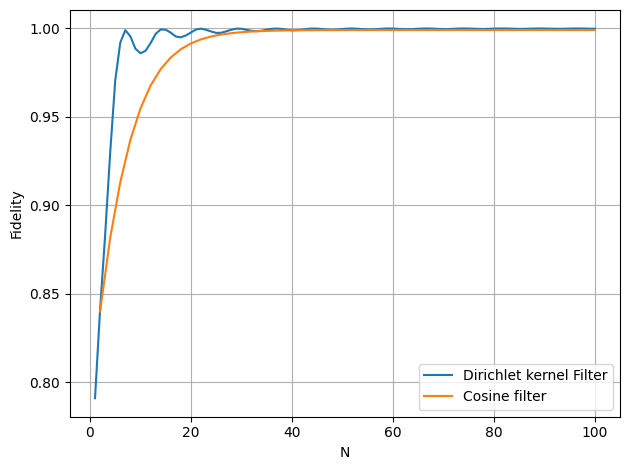

In [4]:
import numpy as np
from scipy.linalg import expm
import matplotlib.pyplot as plt

def get_ground_state(H):
    eigvals, eigvecs = np.linalg.eigh(H)
    return eigvecs[:, np.argmin(eigvals)]

def shift_and_normalize_H(H):
    eigvals = np.linalg.eigvalsh(H)
    λ_min, λ_max = np.min(eigvals), np.max(eigvals)
    H_norm = (H - λ_min * np.eye(len(H))) / (λ_max - λ_min) * np.pi /2
    λ0 = np.min(np.linalg.eigvalsh(H_norm))
    H_shifted = H_norm - λ0 * np.eye(len(H))
    return H_shifted

def shift_and_normalize_H1(H):
    eigvals = np.linalg.eigvalsh(H)
    λ_min, λ_max = np.min(eigvals), np.max(eigvals)
    H_norm = (H - λ_min * np.eye(len(H))) / (λ_max - λ_min) * np.pi
    λ0 = np.min(np.linalg.eigvalsh(H_norm))
    H_shifted = H_norm - λ0 * np.eye(len(H))
    return H_shifted


def cosine_filter_matrix(H, m):
    U = expm(1j * H)
    U_dag = expm(-1j * H)
    cosH = 0.5 * (U + U_dag)
    return np.linalg.matrix_power(cosH, m)

def custom_filter_matrix(H, N):
    return 1/(2*N+1) * sum(expm(-1j * H * i) for i in range(-N, N + 1)) #/ N  # corrected j = N+1 to 2N

def evaluate_fidelity(filter_matrix, init_state, ground_state):
    psi = filter_matrix @ init_state
    psi /= np.linalg.norm(psi)
    return np.abs(np.vdot(psi, ground_state)) #** 2
    #return np.linalg.norm(psi-ground_state)**2

# ==== 主程序设置 ====
n = 6
dim = 2 ** n

def kron_n(op_list):
    result = np.array([[1]])
    for op in op_list:
        result = np.kron(result, op)
    return result

# TFIM Hamiltonian
H = np.zeros((dim, dim), dtype=np.complex128)
Z = np.array([[1, 0], [0, -1]])
X = np.array([[0, 1], [1, 0]])
I = np.eye(2)
for i in range(n):
    Zi = [I] * n
    Zi[i] = Z
    Zi[(i + 1) % n] = Z
    H -= kron_n(Zi)
    Xi = [I] * n
    Xi[i] = X
    H -= kron_n(Xi)

# 归一化并 shift
H_shifted = shift_and_normalize_H(H)
ground_state = get_ground_state(H_shifted)
init_state = np.ones(dim) / np.sqrt(dim)

# Fidelity for cosine filter
# m = 6
# cos_filter = cosine_filter_matrix(H_shifted, m)
# fidelity_cos = evaluate_fidelity(cos_filter, init_state, ground_state)
# print("Fidelity with cos^{2m}(H):", fidelity_cos)

# Fidelity for custom filter as N varies
max_N = 100
fidelity_list = []
for N_iter in range(1, max_N + 1):
    H_shifted = shift_and_normalize_H1(H)
    fH = custom_filter_matrix(H_shifted, N_iter)
    fidelity_custom = evaluate_fidelity(fH, init_state, ground_state)
    fidelity_list.append(fidelity_custom)

fidelity_cos_list = []
for m_vals in range(2,101, 2):
    H_shifted = shift_and_normalize_H1(H)
    cos_filter = cosine_filter_matrix(H_shifted, m_vals)
    fidelity_cos = evaluate_fidelity(cos_filter, init_state, ground_state)
    fidelity_cos_list.append(fidelity_cos)

# 画图
plt.plot(range(1, max_N + 1), fidelity_list, label="Dirichlet kernel Filter")
#plt.axhline(y=fidelity_cos, color='r', linestyle='--', label="cos^{2m}(H) Fidelity")
plt.plot(list(range(2, 101, 2)), fidelity_cos_list, label='Cosine filter')
plt.xlabel("N")
plt.ylabel("Fidelity")
#plt.title("Euclidean distance vs N for Custom Filter")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


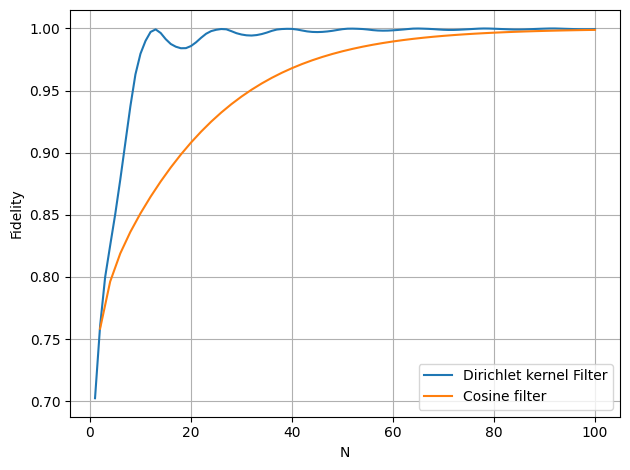

In [5]:
import numpy as np
from scipy.linalg import expm
import matplotlib.pyplot as plt

def get_ground_state(H):
    eigvals, eigvecs = np.linalg.eigh(H)
    return eigvecs[:, np.argmin(eigvals)]

def shift_and_normalize_H(H):
    eigvals = np.linalg.eigvalsh(H)
    λ_min, λ_max = np.min(eigvals), np.max(eigvals)
    H_norm = (H - λ_min * np.eye(len(H))) / (λ_max - λ_min) * np.pi /2
    λ0 = np.min(np.linalg.eigvalsh(H_norm))
    H_shifted = H_norm - λ0 * np.eye(len(H))
    return H_shifted

def shift_and_normalize_H1(H):
    eigvals = np.linalg.eigvalsh(H)
    λ_min, λ_max = np.min(eigvals), np.max(eigvals)
    H_norm = (H - λ_min * np.eye(len(H))) / (λ_max - λ_min) * np.pi
    λ0 = np.min(np.linalg.eigvalsh(H_norm))
    H_shifted = H_norm - λ0 * np.eye(len(H))
    return H_shifted


def cosine_filter_matrix(H, m):
    U = expm(1j * H)
    U_dag = expm(-1j * H)
    cosH = 0.5 * (U + U_dag)
    return np.linalg.matrix_power(cosH, m)

def custom_filter_matrix(H, N):
    return 1/(2*N+1) * sum(expm(-1j * H * i) for i in range(-N, N + 1)) #/ N  # corrected j = N+1 to 2N

def evaluate_fidelity(filter_matrix, init_state, ground_state):
    psi = filter_matrix @ init_state
    psi /= np.linalg.norm(psi)
    return np.abs(np.vdot(psi, ground_state)) #** 2
    #return np.linalg.norm(psi-ground_state)**2

# ==== 主程序设置 ====
n = 8
dim = 2 ** n

def kron_n(op_list):
    result = np.array([[1]])
    for op in op_list:
        result = np.kron(result, op)
    return result

# TFIM Hamiltonian
H = np.zeros((dim, dim), dtype=np.complex128)
Z = np.array([[1, 0], [0, -1]])
X = np.array([[0, 1], [1, 0]])
I = np.eye(2)
for i in range(n):
    Zi = [I] * n
    Zi[i] = Z
    Zi[(i + 1) % n] = Z
    H -= kron_n(Zi)
    Xi = [I] * n
    Xi[i] = X
    H -= kron_n(Xi)

# 归一化并 shift
H_shifted = shift_and_normalize_H(H)
ground_state = get_ground_state(H_shifted)
init_state = np.ones(dim) / np.sqrt(dim)

# Fidelity for cosine filter
# m = 6
# cos_filter = cosine_filter_matrix(H_shifted, m)
# fidelity_cos = evaluate_fidelity(cos_filter, init_state, ground_state)
# print("Fidelity with cos^{2m}(H):", fidelity_cos)

# Fidelity for custom filter as N varies
max_N = 100
fidelity_list = []
for N_iter in range(1, max_N + 1):
    H_shifted = shift_and_normalize_H1(H)
    fH = custom_filter_matrix(H_shifted, N_iter)
    fidelity_custom = evaluate_fidelity(fH, init_state, ground_state)
    fidelity_list.append(fidelity_custom)

fidelity_cos_list = []
for m_vals in range(2,101, 2):
    H_shifted = shift_and_normalize_H1(H)
    cos_filter = cosine_filter_matrix(H_shifted, m_vals)
    fidelity_cos = evaluate_fidelity(cos_filter, init_state, ground_state)
    fidelity_cos_list.append(fidelity_cos)

# 画图
plt.plot(range(1, max_N + 1), fidelity_list, label="Dirichlet kernel Filter")
#plt.axhline(y=fidelity_cos, color='r', linestyle='--', label="cos^{2m}(H) Fidelity")
plt.plot(list(range(2, 101, 2)), fidelity_cos_list, label='Cosine filter')
plt.xlabel("N")
plt.ylabel("Fidelity")
#plt.title("Euclidean distance vs N for Custom Filter")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [9]:
import numpy as np
from scipy.linalg import expm
import matplotlib.pyplot as plt

def get_ground_state(H):
    eigvals, eigvecs = np.linalg.eigh(H)
    return eigvecs[:, np.argmin(eigvals)]

def shift_and_normalize_H(H):
    eigvals = np.linalg.eigvalsh(H)
    λ_min, λ_max = np.min(eigvals), np.max(eigvals)
    H_norm = (H - λ_min * np.eye(len(H))) / (λ_max - λ_min)
    λ0 = np.min(np.linalg.eigvalsh(H_norm))
    H_shifted = H_norm - λ0 * np.eye(len(H))
    return H_shifted

def shift_and_normalize_H1(H):
    eigvals = np.linalg.eigvalsh(H)
    λ_min, λ_max = np.min(eigvals), np.max(eigvals)
    H_norm = (H - λ_min * np.eye(len(H))) / (λ_max - λ_min) * np.pi
    λ0 = np.min(np.linalg.eigvalsh(H_norm))
    H_shifted = H_norm - λ0 * np.eye(len(H))
    return H_shifted


def cosine_filter_matrix(H, m):
    U = expm(1j * H)
    U_dag = expm(-1j * H)
    cosH = 0.5 * (U + U_dag)
    return np.linalg.matrix_power(cosH, m)

def custom_filter_matrix(H, N):
    return 1/(2*N+1) * sum(expm(-1j * H * i) for i in range(-N, N + 1)) #/ N  # corrected j = N+1 to 2N

def evaluate_fidelity(filter_matrix, init_state, ground_state):
    psi = filter_matrix @ init_state
    psi /= np.linalg.norm(psi)
    return np.abs(np.vdot(psi, ground_state)) #** 2
    #return np.linalg.norm(psi-ground_state)**2

# ==== 主程序设置 ====
n = 10
dim = 2 ** n

def kron_n(op_list):
    result = np.array([[1]])
    for op in op_list:
        result = np.kron(result, op)
    return result

# TFIM Hamiltonian
H = np.zeros((dim, dim), dtype=np.complex128)
Z = np.array([[1, 0], [0, -1]])
X = np.array([[0, 1], [1, 0]])
I = np.eye(2)
for i in range(n):
    Zi = [I] * n
    Zi[i] = Z
    Zi[(i + 1) % n] = Z
    H -= kron_n(Zi)
    Xi = [I] * n
    Xi[i] = X
    H -= kron_n(Xi)

# 归一化并 shift
H_shifted = shift_and_normalize_H(H)
ground_state = get_ground_state(H_shifted)
init_state = np.ones(dim) / np.sqrt(dim)

# Fidelity for cosine filter
# m = 6
# cos_filter = cosine_filter_matrix(H_shifted, m)
# fidelity_cos = evaluate_fidelity(cos_filter, init_state, ground_state)
# print("Fidelity with cos^{2m}(H):", fidelity_cos)

# Fidelity for custom filter as N varies
max_N = 200
fidelity_list = []
for N_iter in range(100, max_N + 1):
    H_shifted = shift_and_normalize_H1(H)
    fH = custom_filter_matrix(H_shifted, N_iter)
    fidelity_custom = evaluate_fidelity(fH, init_state, ground_state)
    fidelity_list.append(fidelity_custom)

fidelity_cos_list = []
for m_vals in range(100,201, 2):
    H_shifted = shift_and_normalize_H1(H)
    cos_filter = cosine_filter_matrix(H_shifted, m_vals)
    fidelity_cos = evaluate_fidelity(cos_filter, init_state, ground_state)
    fidelity_cos_list.append(fidelity_cos)

# 画图
plt.plot(range(100, max_N + 1), fidelity_list, label="Dirichlet kernel Filter")
#plt.axhline(y=fidelity_cos, color='r', linestyle='--', label="cos^{2m}(H) Fidelity")
plt.plot(list(range(100, 201, 2)), fidelity_cos_list, label='Cosine filter')
plt.xlabel("N")
plt.ylabel("Fidelity")
#plt.title("Euclidean distance vs N for Custom Filter")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


KeyboardInterrupt: 

In [2]:
# ===== 示例主程序 =====
# 假设 H 已定义
n = 8
dim = 2 ** n  # 例如 4 qubits

def kron_n(op_list):
    result = np.array([[1]])
    for op in op_list:
        result = np.kron(result, op)
    return result

def shift_and_normalize_H(H):
    eigvals = np.linalg.eigvalsh(H)
    λ_min, λ_max = np.min(eigvals), np.max(eigvals)
    H_norm = (H - λ_min * np.eye(len(H))) / (λ_max - λ_min)
    λ0 = np.min(np.linalg.eigvalsh(H_norm))
    H_shifted = H_norm - λ0 * np.eye(len(H))
    return H_shifted

def shift_and_normalize_H1(H):
    eigvals = np.linalg.eigvalsh(H)
    λ_min, λ_max = np.min(eigvals), np.max(eigvals)
    H_norm = (H - λ_min * np.eye(len(H))) / (λ_max - λ_min) * np.pi
    λ0 = np.min(np.linalg.eigvalsh(H_norm))
    H_shifted = H_norm - λ0 * np.eye(len(H))
    return H_shifted


def cosine_filter_matrix(H, m):
    U = expm(1j * H)
    U_dag = expm(-1j * H)
    cosH = 0.5 * (U + U_dag)
    return np.linalg.matrix_power(cosH, m)

def custom_filter_matrix(H, N):
    return 1/(2*N+1) * sum(expm(-1j * H * i) for i in range(-N, N + 1)) #/ N  # corrected j = N+1 to 2N

def evaluate_fidelity(filter_matrix, init_state, ground_state):
    psi = filter_matrix @ init_state
    psi /= np.linalg.norm(psi)
    return np.abs(np.vdot(psi, ground_state)) #** 2
    #return np.linalg.norm(psi-ground_state)**2

# 构造 TFIM H
H = np.zeros((dim, dim), dtype=np.complex128)
Z = np.array([[1, 0], [0, -1]])
X = np.array([[0, 1], [1, 0]])
I = np.eye(2)
for i in range(n):
    Zi = [I] * n
    Zi[i] = Z
    Zi[(i + 1) % n] = Z
    H -= kron_n(Zi)
    Xi = [I] * n
    Xi[i] = X
    H -= kron_n(Xi)

H_shifted = shift_and_normalize_H(H)
ground_state = get_ground_state(H_shifted)
init_state = np.ones(dim) / np.sqrt(dim)

# Cosine filter fidelity
M = 200
cos_filter = cosine_filter_matrix(H_shifted, M)
fidelity_cos = evaluate_fidelity(cos_filter, init_state, ground_state)
print("Euclidean distance with cos^{M}(H):", fidelity_cos)

# Custom filter fidelity
N = 200
H_shifted = shift_and_normalize_H1(H)
fH = custom_filter_matrix(H_shifted, N)
fidelity_custom = evaluate_fidelity(fH, init_state, ground_state)
print("Euclidean distance with custom f(H):", fidelity_custom)

Euclidean distance with cos^{M}(H): 0.9086546442395737
Euclidean distance with custom f(H): 0.9999105426162028


In [5]:
# ===== 示例主程序 =====
# 假设 H 已定义
n = 10
dim = 2 ** n  # 例如 4 qubits

def kron_n(op_list):
    result = np.array([[1]])
    for op in op_list:
        result = np.kron(result, op)
    return result

def shift_and_normalize_H(H):
    eigvals = np.linalg.eigvalsh(H)
    λ_min, λ_max = np.min(eigvals), np.max(eigvals)
    H_norm = (H - λ_min * np.eye(len(H))) / (λ_max - λ_min)
    λ0 = np.min(np.linalg.eigvalsh(H_norm))
    H_shifted = H_norm - λ0 * np.eye(len(H))
    return H_shifted

def shift_and_normalize_H1(H):
    eigvals = np.linalg.eigvalsh(H)
    λ_min, λ_max = np.min(eigvals), np.max(eigvals)
    H_norm = (H - λ_min * np.eye(len(H))) / (λ_max - λ_min) * np.pi
    λ0 = np.min(np.linalg.eigvalsh(H_norm))
    H_shifted = H_norm - λ0 * np.eye(len(H))
    return H_shifted


def cosine_filter_matrix(H, m):
    U = expm(1j * H)
    U_dag = expm(-1j * H)
    cosH = 0.5 * (U + U_dag)
    return np.linalg.matrix_power(cosH, m)

def custom_filter_matrix(H, N):
    return 1/(2*N+1) * sum(expm(-1j * H * i) for i in range(-N, N + 1)) #/ N  # corrected j = N+1 to 2N

def evaluate_fidelity(filter_matrix, init_state, ground_state):
    psi = filter_matrix @ init_state
    psi /= np.linalg.norm(psi)
    return np.abs(np.vdot(psi, ground_state)) #** 2
    #return np.linalg.norm(psi-ground_state)**2

# 构造 TFIM H
H = np.zeros((dim, dim), dtype=np.complex128)
Z = np.array([[1, 0], [0, -1]])
X = np.array([[0, 1], [1, 0]])
I = np.eye(2)
for i in range(n):
    Zi = [I] * n
    Zi[i] = Z
    Zi[(i + 1) % n] = Z
    H -= kron_n(Zi)
    Xi = [I] * n
    Xi[i] = X
    H -= kron_n(Xi)

H_shifted = shift_and_normalize_H1(H)
ground_state = get_ground_state(H_shifted)
init_state = np.ones(dim) / np.sqrt(dim)

# Cosine filter fidelity
M = 100
cos_filter = cosine_filter_matrix(H_shifted, M)
fidelity_cos = evaluate_fidelity(cos_filter, init_state, ground_state)
print("Euclidean distance with cos^{M}(H):", fidelity_cos)

# Custom filter fidelity
N = 50
H_shifted = shift_and_normalize_H1(H)
fH = custom_filter_matrix(H_shifted, N)
fidelity_custom = evaluate_fidelity(fH, init_state, ground_state)
print("Euclidean distance with custom f(H):", fidelity_custom)

Euclidean distance with cos^{M}(H): 0.9676577913990841
Euclidean distance with custom f(H): 0.9937481416904972


Fidelity with cos^{2m}(H): 0.6610608160069082


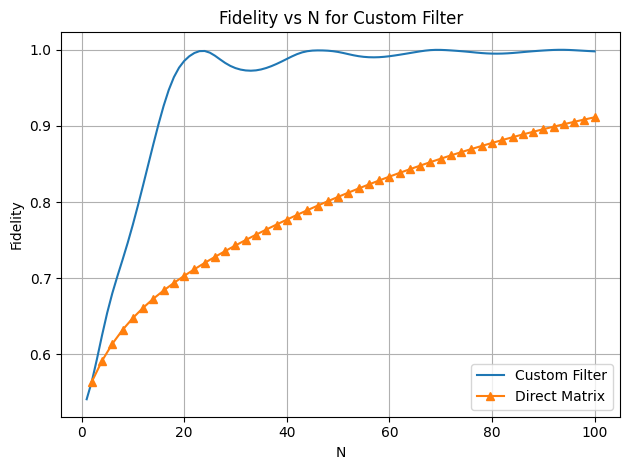

In [32]:
# ==== 主程序设置 ====
n = 6
dim = 2 ** n

def kron_n(op_list):
    result = np.array([[1]])
    for op in op_list:
        result = np.kron(result, op)
    return result

# TFIM Hamiltonian
H = np.zeros((dim, dim), dtype=np.complex128)
Z = np.array([[1, 0], [0, -1]])
X = np.array([[0, 1], [1, 0]])
I = np.eye(2)
for i in range(n):
    Zi = [I] * n
    Zi[i] = Z
    Zi[(i + 1) % n] = Z
    H -= kron_n(Zi)
    Xi = [I] * n
    Xi[i] = X
    H -= kron_n(Xi)

# 归一化并 shift
H_shifted = shift_and_normalize_H(H)
ground_state = get_ground_state(H_shifted)
init_state = np.ones(dim) / np.sqrt(dim)

# Fidelity for cosine filter
m = 6
cos_filter = cosine_filter_matrix(H_shifted, m)
fidelity_cos = evaluate_fidelity(cos_filter, init_state, ground_state)
print("Fidelity with cos^{2m}(H):", fidelity_cos)

# Fidelity for custom filter as N varies
max_N = 100
fidelity_list = []
for N_iter in range(1, max_N + 1):
    fH = custom_filter_matrix(H_shifted, N_iter)
    fidelity_custom = evaluate_fidelity(fH, init_state, ground_state)
    fidelity_list.append(fidelity_custom)

fidelity_cos_list = []
for m_vals in range(1,51):
    cos_filter = cosine_filter_matrix(H_shifted, m_vals)
    fidelity_cos = evaluate_fidelity(cos_filter, init_state, ground_state)
    fidelity_cos_list.append(fidelity_cos)

# 画图
plt.plot(range(1, max_N + 1), fidelity_list, label="Custom Filter")
#plt.axhline(y=fidelity_cos, color='r', linestyle='--', label="cos^{2m}(H) Fidelity")
plt.plot(list(range(2, 102, 2)), fidelity_cos_list, marker='^', label='Direct Matrix')
plt.xlabel("N")
plt.ylabel("Fidelity")
plt.title("Fidelity vs N for Custom Filter")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Fidelity with cos^{2m}(H): 0.5277961651806085


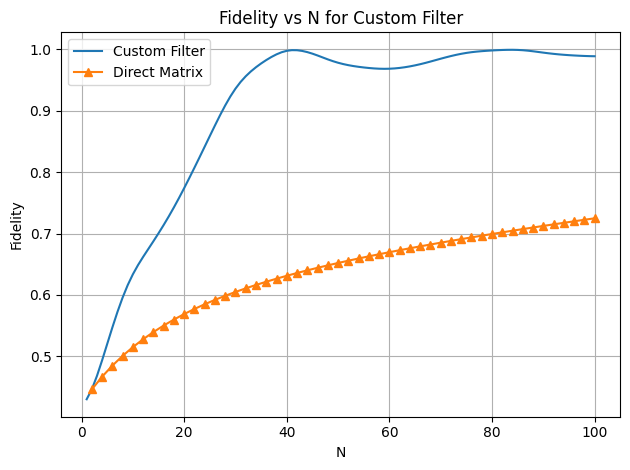

In [33]:
# ==== 主程序设置 ====
n = 8
dim = 2 ** n

def kron_n(op_list):
    result = np.array([[1]])
    for op in op_list:
        result = np.kron(result, op)
    return result

# TFIM Hamiltonian
H = np.zeros((dim, dim), dtype=np.complex128)
Z = np.array([[1, 0], [0, -1]])
X = np.array([[0, 1], [1, 0]])
I = np.eye(2)
for i in range(n):
    Zi = [I] * n
    Zi[i] = Z
    Zi[(i + 1) % n] = Z
    H -= kron_n(Zi)
    Xi = [I] * n
    Xi[i] = X
    H -= kron_n(Xi)

# 归一化并 shift
H_shifted = shift_and_normalize_H(H)
ground_state = get_ground_state(H_shifted)
init_state = np.ones(dim) / np.sqrt(dim)

# Fidelity for cosine filter
m = 6
cos_filter = cosine_filter_matrix(H_shifted, m)
fidelity_cos = evaluate_fidelity(cos_filter, init_state, ground_state)
print("Fidelity with cos^{2m}(H):", fidelity_cos)

# Fidelity for custom filter as N varies
max_N = 100
fidelity_list = []
for N_iter in range(1, max_N + 1):
    fH = custom_filter_matrix(H_shifted, N_iter)
    fidelity_custom = evaluate_fidelity(fH, init_state, ground_state)
    fidelity_list.append(fidelity_custom)

fidelity_cos_list = []
for m_vals in range(1,51):
    cos_filter = cosine_filter_matrix(H_shifted, m_vals)
    fidelity_cos = evaluate_fidelity(cos_filter, init_state, ground_state)
    fidelity_cos_list.append(fidelity_cos)

# 画图
plt.plot(range(1, max_N + 1), fidelity_list, label="Custom Filter")
#plt.axhline(y=fidelity_cos, color='r', linestyle='--', label="cos^{2m}(H) Fidelity")
plt.plot(list(range(2, 102, 2)), fidelity_cos_list, marker='^', label='Direct Matrix')
plt.xlabel("N")
plt.ylabel("Fidelity")
plt.title("Fidelity vs N for Custom Filter")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Fidelity with cos^{2m}(H): 0.41918531994595687


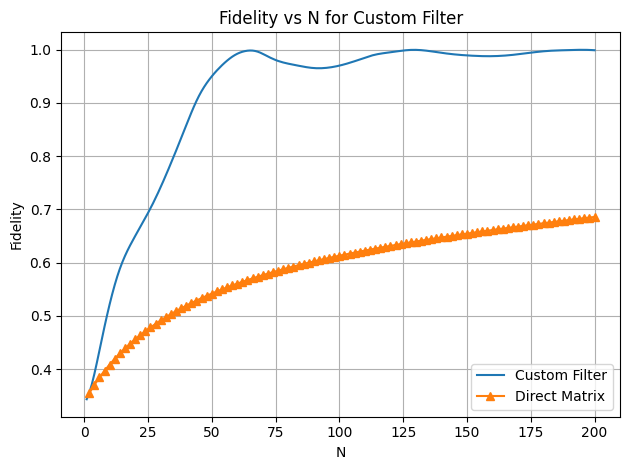

In [34]:
# ==== 主程序设置 ====
n = 10
dim = 2 ** n

def kron_n(op_list):
    result = np.array([[1]])
    for op in op_list:
        result = np.kron(result, op)
    return result

# TFIM Hamiltonian
H = np.zeros((dim, dim), dtype=np.complex128)
Z = np.array([[1, 0], [0, -1]])
X = np.array([[0, 1], [1, 0]])
I = np.eye(2)
for i in range(n):
    Zi = [I] * n
    Zi[i] = Z
    Zi[(i + 1) % n] = Z
    H -= kron_n(Zi)
    Xi = [I] * n
    Xi[i] = X
    H -= kron_n(Xi)

# 归一化并 shift
H_shifted = shift_and_normalize_H(H)
ground_state = get_ground_state(H_shifted)
init_state = np.ones(dim) / np.sqrt(dim)

# Fidelity for cosine filter
m = 6
cos_filter = cosine_filter_matrix(H_shifted, m)
fidelity_cos = evaluate_fidelity(cos_filter, init_state, ground_state)
print("Fidelity with cos^{2m}(H):", fidelity_cos)

# Fidelity for custom filter as N varies
max_N = 200
fidelity_list = []
for N_iter in range(1, max_N + 1):
    fH = custom_filter_matrix(H_shifted, N_iter)
    fidelity_custom = evaluate_fidelity(fH, init_state, ground_state)
    fidelity_list.append(fidelity_custom)

fidelity_cos_list = []
for m_vals in range(1,101):
    cos_filter = cosine_filter_matrix(H_shifted, m_vals)
    fidelity_cos = evaluate_fidelity(cos_filter, init_state, ground_state)
    fidelity_cos_list.append(fidelity_cos)

# 画图
plt.plot(range(1, max_N + 1), fidelity_list, label="Custom Filter")
#plt.axhline(y=fidelity_cos, color='r', linestyle='--', label="cos^{2m}(H) Fidelity")
plt.plot(list(range(2, 201, 2)), fidelity_cos_list, marker='^', label='Direct Matrix')
plt.xlabel("N")
plt.ylabel("Fidelity")
plt.title("Fidelity vs N for Custom Filter")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# XYZ model

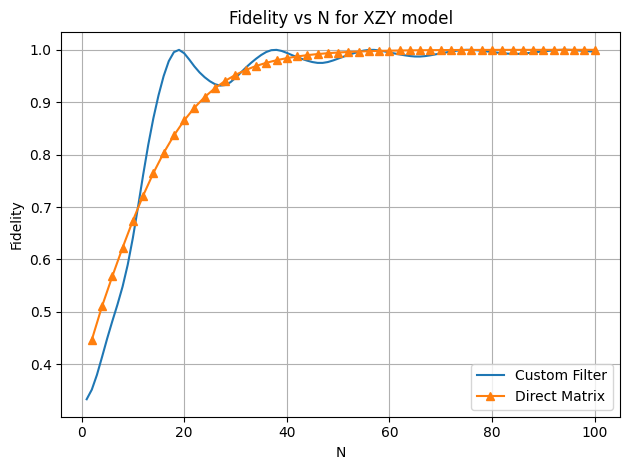

In [74]:
def heisenberg_xyz_hamiltonian(n, Jx=1.0, Jy=1.0, Jz=1.0):
    dim = 2 ** n
    X = np.array([[0, 1], [1, 0]])
    Y = np.array([[0, -1j], [1j, 0]])
    Z = np.array([[1, 0], [0, -1]])
    I = np.eye(2)

    def kron_n(op_list):
        result = np.array([[1]])
        for op in op_list:
            result = np.kron(result, op)
        return result

    H = np.zeros((dim, dim), dtype=np.complex128)

    for i in range(n):
        for op, J in zip([X, Y, Z], [Jx, Jy, Jz]):
            ops = [I] * n
            ops[i] = op
            ops[(i + 1) % n] = op  # 周期性边界条件
            H += J * kron_n(ops)

    return H
n = 4
dim = 2 ** n
H = heisenberg_xyz_hamiltonian(n, Jx=1.0, Jy=1.0, Jz=1.0)


# 归一化并 shift
H_shifted = shift_and_normalize_H(H)
ground_state = get_ground_state(H_shifted)
init_state = np.zeros(dim)
init_state[int('0101', 2)] = 1.0  # 手动设为 |0101⟩

# Fidelity for custom filter as N varies
max_N = 100
fidelity_list = []
for N_iter in range(1, max_N + 1):
    fH = custom_filter_matrix(H_shifted, N_iter)
    fidelity_custom = evaluate_fidelity(fH, init_state, ground_state)
    fidelity_list.append(fidelity_custom)
# Fidelity for cosine filter
fidelity_cos_list = []
for m_vals in range(1,51):
    cos_filter = cosine_filter_matrix(H_shifted, m_vals)
    fidelity_cos = evaluate_fidelity(cos_filter, init_state, ground_state)
    fidelity_cos_list.append(fidelity_cos)

# 画图
plt.plot(range(1, max_N + 1), fidelity_list, label="Custom Filter")
#plt.axhline(y=fidelity_cos, color='r', linestyle='--', label="cos^{2m}(H) Fidelity")
plt.plot(list(range(2, 102, 2)), fidelity_cos_list, marker='^', label='Direct Matrix')
plt.xlabel("N")
plt.ylabel("Fidelity")
plt.title("Fidelity vs N for XZY model")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

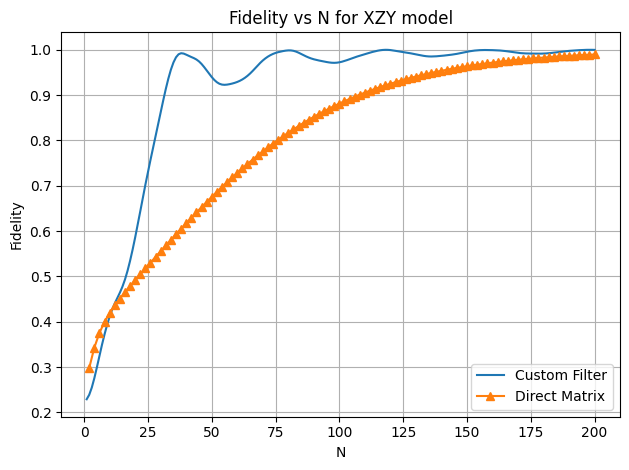

In [79]:
n = 6
dim = 2 ** n
H = heisenberg_xyz_hamiltonian(n, Jx=1.0, Jy=1.0, Jz=1.0)


# 归一化并 shift
H_shifted = shift_and_normalize_H(H)
ground_state = get_ground_state(H_shifted)
init_state = np.zeros(dim)
init_state[int('010101', 2)] = 1.0  # 手动设为 |0101⟩

# Fidelity for custom filter as N varies
max_N = 200
fidelity_list = []
for N_iter in range(1, max_N + 1):
    fH = custom_filter_matrix(H_shifted, N_iter)
    fidelity_custom = evaluate_fidelity(fH, init_state, ground_state)
    fidelity_list.append(fidelity_custom)
# Fidelity for cosine filter
fidelity_cos_list = []
for m_vals in range(1,101):
    cos_filter = cosine_filter_matrix(H_shifted, m_vals)
    fidelity_cos = evaluate_fidelity(cos_filter, init_state, ground_state)
    fidelity_cos_list.append(fidelity_cos)

# 画图
plt.plot(range(1, max_N + 1), fidelity_list, label="Custom Filter")
#plt.axhline(y=fidelity_cos, color='r', linestyle='--', label="cos^{2m}(H) Fidelity")
plt.plot(list(range(2, 201, 2)), fidelity_cos_list, marker='^', label='Direct Matrix')
plt.xlabel("N")
plt.ylabel("Fidelity")
plt.title("Fidelity vs N for XZY model")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

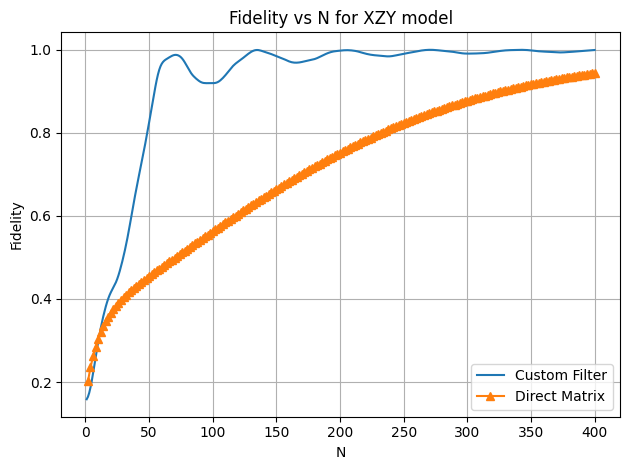

In [80]:
n = 8
dim = 2 ** n
H = heisenberg_xyz_hamiltonian(n, Jx=1.0, Jy=1.0, Jz=1.0)


# 归一化并 shift
H_shifted = shift_and_normalize_H(H)
ground_state = get_ground_state(H_shifted)
init_state = np.zeros(dim)
init_state[int('01010101', 2)] = 1.0  # 手动设为 |0101⟩

# Fidelity for custom filter as N varies
max_N = 400
fidelity_list = []
for N_iter in range(1, max_N + 1):
    fH = custom_filter_matrix(H_shifted, N_iter)
    fidelity_custom = evaluate_fidelity(fH, init_state, ground_state)
    fidelity_list.append(fidelity_custom)
# Fidelity for cosine filter
fidelity_cos_list = []
for m_vals in range(1,201):
    cos_filter = cosine_filter_matrix(H_shifted, m_vals)
    fidelity_cos = evaluate_fidelity(cos_filter, init_state, ground_state)
    fidelity_cos_list.append(fidelity_cos)

# 画图
plt.plot(range(1, max_N + 1), fidelity_list, label="Custom Filter")
#plt.axhline(y=fidelity_cos, color='r', linestyle='--', label="cos^{2m}(H) Fidelity")
plt.plot(list(range(2, 401, 2)), fidelity_cos_list, marker='^', label='Direct Matrix')
plt.xlabel("N")
plt.ylabel("Fidelity")
plt.title("Fidelity vs N for XZY model")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Gaussian filter

In [ ]:
import numpy as np
from scipy.integrate import quad
from scipy.special import erf
sigma = 1
Y = 40.0
h = 5.0
def integrand(y, h, sigma):
    return np.exp(-sigma**2 * y**2 / 4 - 1j * h * y)

def compute_integral(h, sigma, Y):
    real = quad(lambda y: integrand(y, h, sigma).real, -Y, Y)[0]
    imag = quad(lambda y: integrand(y, h, sigma).imag, -Y, Y)[0]
    return (sigma / (2 * np.sqrt(np.pi))) * (real + 1j * imag)

def compute_exact(h, sigma):
    return np.exp(-h**2/sigma**2)
# erf()-erf()
def closed_form_correct(h, sigma, Y):
    z1 = 1j * h / sigma + sigma * Y / 2
    z2 = 1j * h / sigma - sigma * Y / 2
    return 1/2 * np.exp(-h**2 / sigma**2) * (erf(z1) - erf(z2))

# erf() + erf()
def closed_form_wrong(h, sigma, Y):
    z1 = 1j * h / sigma + sigma * Y / 2
    z2 = 1j * h / sigma - sigma * Y / 2
    return 1/2* np.exp(-h**2 / sigma**2) * (erf(z1) + erf(z2))

num_exact = compute_exact(h, sigma)
num_val = compute_integral(h, sigma, Y)
correct_val = closed_form_correct(h, sigma, Y)
wrong_val = closed_form_wrong(h, sigma, Y)

print("Exact =", num_exact)
#print("Numerical       =", num_val)
print("Closed-form -   =", correct_val)
print("Closed-form +   =", wrong_val)


# Dirichlet filter

Fidelity with cos^{2m}(H): 0.8641917937225917


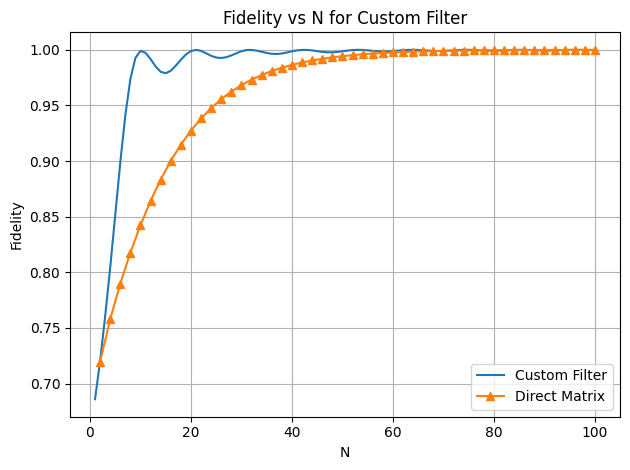

In [37]:
import numpy as np
from scipy.linalg import expm
import matplotlib.pyplot as plt

def get_ground_state(H):
    eigvals, eigvecs = np.linalg.eigh(H)
    return eigvecs[:, np.argmin(eigvals)]

def shift_and_normalize_H(H):
    eigvals = np.linalg.eigvalsh(H)
    λ_min, λ_max = np.min(eigvals), np.max(eigvals)
    H_norm = (H - λ_min * np.eye(len(H))) / (λ_max - λ_min)
    λ0 = np.min(np.linalg.eigvalsh(H_norm))
    H_shifted = H_norm - λ0 * np.eye(len(H))
    return H_shifted

def cosine_filter_matrix(H, m):
    U = expm(1j * H)
    U_dag = expm(-1j * H)
    cosH = 0.5 * (U + U_dag)
    return np.linalg.matrix_power(cosH, 2 * m)

def custom_filter_matrix(H, N):
    return sum(expm(-1j * H * i) for i in range(-N, N + 1)) / (2*N+1)  # corrected j = N+1 to 2N

def evaluate_fidelity(filter_matrix, init_state, ground_state):
    psi = filter_matrix @ init_state
    psi /= np.linalg.norm(psi)
    return np.abs(np.vdot(psi, ground_state)) ** 2

# ==== 主程序设置 ====
n = 4
dim = 2 ** n

def kron_n(op_list):
    result = np.array([[1]])
    for op in op_list:
        result = np.kron(result, op)
    return result

# TFIM Hamiltonian
H = np.zeros((dim, dim), dtype=np.complex128)
Z = np.array([[1, 0], [0, -1]])
X = np.array([[0, 1], [1, 0]])
I = np.eye(2)
for i in range(n):
    Zi = [I] * n
    Zi[i] = Z
    Zi[(i + 1) % n] = Z
    H -= kron_n(Zi)
    Xi = [I] * n
    Xi[i] = X
    H -= kron_n(Xi)

# 归一化并 shift
H_shifted = shift_and_normalize_H(H)
ground_state = get_ground_state(H_shifted)
init_state = np.ones(dim) / np.sqrt(dim)

# Fidelity for cosine filter
m = 6
cos_filter = cosine_filter_matrix(H_shifted, m)
fidelity_cos = evaluate_fidelity(cos_filter, init_state, ground_state)
print("Fidelity with cos^{2m}(H):", fidelity_cos)

# Fidelity for custom filter as N varies
max_N = 100
fidelity_list = []
for N_iter in range(1, max_N + 1):
    fH = custom_filter_matrix(H_shifted, N_iter)
    fidelity_custom = evaluate_fidelity(fH, init_state, ground_state)
    fidelity_list.append(fidelity_custom)

fidelity_cos_list = []
for m_vals in range(1,51):
    cos_filter = cosine_filter_matrix(H_shifted, m_vals)
    fidelity_cos = evaluate_fidelity(cos_filter, init_state, ground_state)
    fidelity_cos_list.append(fidelity_cos)

# 画图
plt.plot(range(1, max_N + 1), fidelity_list, label="Custom Filter")
#plt.axhline(y=fidelity_cos, color='r', linestyle='--', label="cos^{2m}(H) Fidelity")
plt.plot(list(range(2, 102, 2)), fidelity_cos_list, marker='^', label='Direct Matrix')
plt.xlabel("N")
plt.ylabel("Fidelity")
plt.title("Fidelity vs N for Custom Filter")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



Fidelity with cos^{2m}(H): 0.6610608160069082


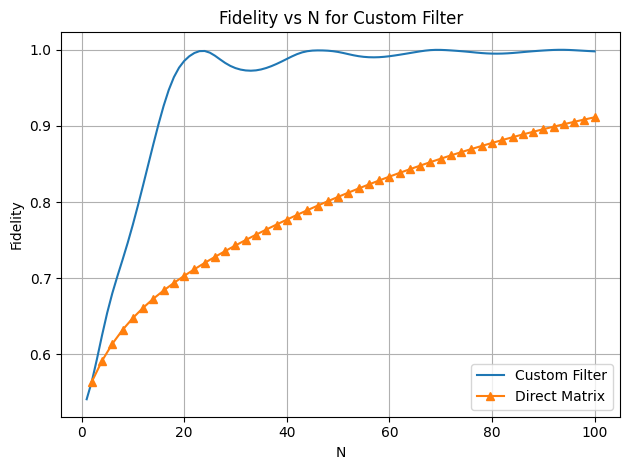

In [38]:
import numpy as np
from scipy.linalg import expm
import matplotlib.pyplot as plt

def get_ground_state(H):
    eigvals, eigvecs = np.linalg.eigh(H)
    return eigvecs[:, np.argmin(eigvals)]

def shift_and_normalize_H(H):
    eigvals = np.linalg.eigvalsh(H)
    λ_min, λ_max = np.min(eigvals), np.max(eigvals)
    H_norm = (H - λ_min * np.eye(len(H))) / (λ_max - λ_min)
    λ0 = np.min(np.linalg.eigvalsh(H_norm))
    H_shifted = H_norm - λ0 * np.eye(len(H))
    return H_shifted

def cosine_filter_matrix(H, m):
    U = expm(1j * H)
    U_dag = expm(-1j * H)
    cosH = 0.5 * (U + U_dag)
    return np.linalg.matrix_power(cosH, 2 * m)

def custom_filter_matrix(H, N):
    return sum(expm(-1j * H * i) for i in range(-N, N + 1)) / (2*N+1)  # corrected j = N+1 to 2N

def evaluate_fidelity(filter_matrix, init_state, ground_state):
    psi = filter_matrix @ init_state
    psi /= np.linalg.norm(psi)
    return np.abs(np.vdot(psi, ground_state)) ** 2

# ==== 主程序设置 ====
n = 6
dim = 2 ** n

def kron_n(op_list):
    result = np.array([[1]])
    for op in op_list:
        result = np.kron(result, op)
    return result

# TFIM Hamiltonian
H = np.zeros((dim, dim), dtype=np.complex128)
Z = np.array([[1, 0], [0, -1]])
X = np.array([[0, 1], [1, 0]])
I = np.eye(2)
for i in range(n):
    Zi = [I] * n
    Zi[i] = Z
    Zi[(i + 1) % n] = Z
    H -= kron_n(Zi)
    Xi = [I] * n
    Xi[i] = X
    H -= kron_n(Xi)

# 归一化并 shift
H_shifted = shift_and_normalize_H(H)
ground_state = get_ground_state(H_shifted)
init_state = np.ones(dim) / np.sqrt(dim)

# Fidelity for cosine filter
m = 6
cos_filter = cosine_filter_matrix(H_shifted, m)
fidelity_cos = evaluate_fidelity(cos_filter, init_state, ground_state)
print("Fidelity with cos^{2m}(H):", fidelity_cos)

# Fidelity for custom filter as N varies
max_N = 100
fidelity_list = []
for N_iter in range(1, max_N + 1):
    fH = custom_filter_matrix(H_shifted, N_iter)
    fidelity_custom = evaluate_fidelity(fH, init_state, ground_state)
    fidelity_list.append(fidelity_custom)

fidelity_cos_list = []
for m_vals in range(1,51):
    cos_filter = cosine_filter_matrix(H_shifted, m_vals)
    fidelity_cos = evaluate_fidelity(cos_filter, init_state, ground_state)
    fidelity_cos_list.append(fidelity_cos)

# 画图
plt.plot(range(1, max_N + 1), fidelity_list, label="Custom Filter")
#plt.axhline(y=fidelity_cos, color='r', linestyle='--', label="cos^{2m}(H) Fidelity")
plt.plot(list(range(2, 102, 2)), fidelity_cos_list, marker='^', label='Direct Matrix')
plt.xlabel("N")
plt.ylabel("Fidelity")
plt.title("Fidelity vs N for Custom Filter")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



Fidelity with cos^{2m}(H): 0.5277961651806085


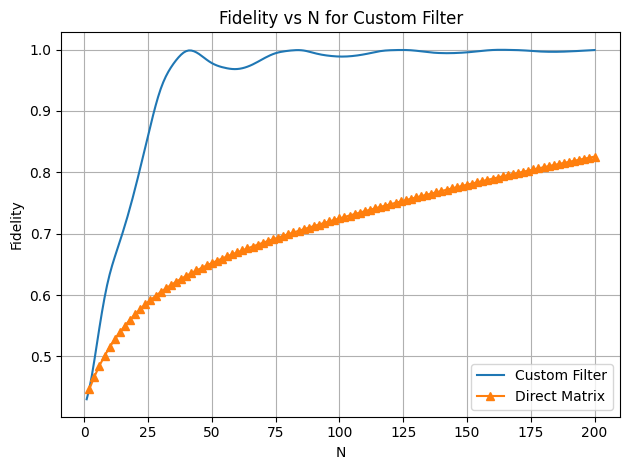

In [39]:
import numpy as np
from scipy.linalg import expm
import matplotlib.pyplot as plt

def get_ground_state(H):
    eigvals, eigvecs = np.linalg.eigh(H)
    return eigvecs[:, np.argmin(eigvals)]

def shift_and_normalize_H(H):
    eigvals = np.linalg.eigvalsh(H)
    λ_min, λ_max = np.min(eigvals), np.max(eigvals)
    H_norm = (H - λ_min * np.eye(len(H))) / (λ_max - λ_min)
    λ0 = np.min(np.linalg.eigvalsh(H_norm))
    H_shifted = H_norm - λ0 * np.eye(len(H))
    return H_shifted

def cosine_filter_matrix(H, m):
    U = expm(1j * H)
    U_dag = expm(-1j * H)
    cosH = 0.5 * (U + U_dag)
    return np.linalg.matrix_power(cosH, 2 * m)

def custom_filter_matrix(H, N):
    return sum(expm(-1j * H * i) for i in range(-N, N + 1)) / (2*N+1)  # corrected j = N+1 to 2N

def evaluate_fidelity(filter_matrix, init_state, ground_state):
    psi = filter_matrix @ init_state
    psi /= np.linalg.norm(psi)
    return np.abs(np.vdot(psi, ground_state)) ** 2

# ==== 主程序设置 ====
n = 8
dim = 2 ** n

def kron_n(op_list):
    result = np.array([[1]])
    for op in op_list:
        result = np.kron(result, op)
    return result

# TFIM Hamiltonian
H = np.zeros((dim, dim), dtype=np.complex128)
Z = np.array([[1, 0], [0, -1]])
X = np.array([[0, 1], [1, 0]])
I = np.eye(2)
for i in range(n):
    Zi = [I] * n
    Zi[i] = Z
    Zi[(i + 1) % n] = Z
    H -= kron_n(Zi)
    Xi = [I] * n
    Xi[i] = X
    H -= kron_n(Xi)

# 归一化并 shift
H_shifted = shift_and_normalize_H(H)
ground_state = get_ground_state(H_shifted)
init_state = np.ones(dim) / np.sqrt(dim)

# Fidelity for cosine filter
m = 6
cos_filter = cosine_filter_matrix(H_shifted, m)
fidelity_cos = evaluate_fidelity(cos_filter, init_state, ground_state)
print("Fidelity with cos^{2m}(H):", fidelity_cos)

# Fidelity for custom filter as N varies
max_N = 200
fidelity_list = []
for N_iter in range(1, max_N + 1):
    fH = custom_filter_matrix(H_shifted, N_iter)
    fidelity_custom = evaluate_fidelity(fH, init_state, ground_state)
    fidelity_list.append(fidelity_custom)

fidelity_cos_list = []
for m_vals in range(1,101):
    cos_filter = cosine_filter_matrix(H_shifted, m_vals)
    fidelity_cos = evaluate_fidelity(cos_filter, init_state, ground_state)
    fidelity_cos_list.append(fidelity_cos)

# 画图
plt.plot(range(1, max_N + 1), fidelity_list, label="Custom Filter")
#plt.axhline(y=fidelity_cos, color='r', linestyle='--', label="cos^{2m}(H) Fidelity")
plt.plot(list(range(2, 201, 2)), fidelity_cos_list, marker='^', label='Direct Matrix')
plt.xlabel("N")
plt.ylabel("Fidelity")
plt.title("Fidelity vs N for Custom Filter")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



Circuit design

In [5]:
import math
import pennylane as qml
from scipy.linalg import expm

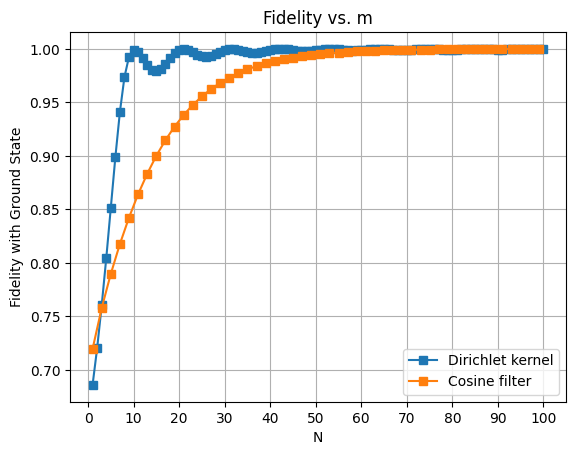

In [70]:
n = 4
dim = 2 ** n

def kron_n(op_list):
    result = np.array([[1]])
    for op in op_list:
        result = np.kron(result, op)
    return result

# TFIM Hamiltonian
H = np.zeros((dim, dim), dtype=np.complex128)
Z = np.array([[1, 0], [0, -1]])
X = np.array([[0, 1], [1, 0]])
I = np.eye(2)
for i in range(n):
    Zi = [I] * n
    Zi[i] = Z
    Zi[(i + 1) % n] = Z
    H -= kron_n(Zi)
    Xi = [I] * n
    Xi[i] = X
    H -= kron_n(Xi)

# 归一化并 shift
H_shifted = shift_and_normalize_H(H)
ground_state = get_ground_state(H_shifted)
init_state = np.ones(dim) / np.sqrt(dim)
def dirichlet_block_encoding(max_N):
    k_vals_full = np.arange(-max_N, max_N + 1)
    alpha_k = np.array([1/(2* max_N + 1) for k in k_vals_full])

    pad_len = 2 ** int(np.ceil(np.log2(len(alpha_k))))
    alpha_padded = np.zeros(pad_len)
    alpha_padded[:len(alpha_k)] = alpha_k
    weights = np.sqrt(alpha_padded / np.sum(alpha_padded))
    #weights = alpha_padded
    #print('weights:', weights)
    n_anc = int(np.log2(pad_len))
    ancilla_wires = list(range(n_anc))
    system_wires = list(range(n_anc, n_anc + n))
    U_list = [expm(-1.0j * k * H_shifted) for k in k_vals_full]
    U_list += [np.eye(dim)] * (pad_len - len(U_list))
    U_ops = [qml.QubitUnitary(U, wires=range(n_anc, n_anc + n)) for U in U_list]
    dev = qml.device("default.qubit", wires=n + n_anc)

    @qml.qnode(dev)
    def block_encoding():
        for i in system_wires:
            qml.Hadamard(i)
        # for i in range(n_anc, n+n_anc, 2):
        #     qml.X(i)
        qml.StatePrep(weights, wires=range(n_anc))
        qml.Select(U_ops, control=range(n_anc))
        qml.adjoint(qml.StatePrep)(weights, wires=range(n_anc))
        return qml.state()

    # U_be = qml.matrix(block_encoding, wire_order=list(range(n_anc)) + list(range(n_anc, n_anc + n)))()
    # A_block = U_be[:dim, :dim]
    # be_state = A_block @ init_state
    full_state = block_encoding()
    reshaped = full_state.reshape((2 ** n_anc, 2 ** n))
    system_state = reshaped[0, :]
    be_state = system_state

    success_prob = np.sum(np.abs(be_state) ** 2)
    be_state /= np.linalg.norm(be_state)
    fidelity = np.abs(np.vdot(be_state, ground_state)) ** 2
    return fidelity, success_prob


def fidelity_block_encoding(m):
    k_vals_full = np.arange(-m, m + 1)
    alpha_k_full = 2 ** (-2 * m) * np.array([math.comb(2 * m, m + k) for k in k_vals_full])
    keep = [i for i in range(len(alpha_k_full)) if alpha_k_full[i] > 1e-4]
    alpha_k = alpha_k_full[keep]
    k_vals = k_vals_full[keep]
    alpha_k /= np.sum(alpha_k)
    pad_len = 2 ** int(np.ceil(np.log2(len(alpha_k))))
    alpha_padded = np.zeros(pad_len)
    alpha_padded[:len(alpha_k)] = alpha_k
    weights = np.sqrt(alpha_padded / np.sum(alpha_padded))
    n_anc = int(np.log2(pad_len))
    ancilla_wires = list(range(n_anc))
    system_wires = list(range(n_anc, n_anc + n))
    U_list = [expm(2j * k * H_shifted) for k in k_vals]
    U_list += [np.eye(dim)] * (pad_len - len(U_list))
    U_ops = [qml.QubitUnitary(U, wires=range(n_anc, n_anc + n)) for U in U_list]
    dev = qml.device("default.qubit", wires=n + n_anc)

    @qml.qnode(dev)
    def block_encoding():
        for i in system_wires:
            qml.Hadamard(i)
        # for i in range(n_anc, n+n_anc, 2):
        #     qml.X(i)
        qml.StatePrep(weights, wires=range(n_anc))
        qml.Select(U_ops, control=range(n_anc))
        qml.adjoint(qml.StatePrep)(weights, wires=range(n_anc))
        return qml.state()

    # U_be = qml.matrix(block_encoding, wire_order=list(range(n_anc)) + list(range(n_anc, n_anc + n)))()
    # A_block = U_be[:dim, :dim]
    # be_state = A_block @ init_state
    full_state = block_encoding()
    reshaped = full_state.reshape((2 ** n_anc, 2 ** n))
    system_state = reshaped[0, :]
    be_state = system_state

    success_prob = np.sum(np.abs(be_state) ** 2)
    be_state /= np.linalg.norm(be_state)
    fidelity = np.abs(np.vdot(be_state, ground_state)) ** 2
    return fidelity, success_prob


# 扫描 m
max_N = 20*5
m_vals = list(range(1, max_N + 1))
fidelity_cosine, success_cosine = zip(*[fidelity_block_encoding(m) for m in list(range(1, max_N//2 + 1))])

N_list = list(range(1, max_N + 1))
fidelity_be, success_be = zip(*[dirichlet_block_encoding(N) for N in N_list])
plt.plot(N_list, fidelity_be, marker='s', label='Dirichlet kernel')
plt.plot(list(range(1, max_N + 1, 2)), fidelity_cosine, marker='s', label='Cosine filter')
plt.xlabel("N")
plt.xticks(list(range(0, max_N + 1, 10)))
plt.ylabel("Fidelity with Ground State")
plt.title("Fidelity vs. m")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
n = 4
dim = 2 ** n

def kron_n(op_list):
    result = np.array([[1]])
    for op in op_list:
        result = np.kron(result, op)
    return result

# TFIM Hamiltonian
H = np.zeros((dim, dim), dtype=np.complex128)
Z = np.array([[1, 0], [0, -1]])
X = np.array([[0, 1], [1, 0]])
I = np.eye(2)
for i in range(n):
    Zi = [I] * n
    Zi[i] = Z
    Zi[(i + 1) % n] = Z
    H -= kron_n(Zi)
    Xi = [I] * n
    Xi[i] = X
    H -= kron_n(Xi)

# 归一化并 shift
H_shifted = shift_and_normalize_H(H)
ground_state = get_ground_state(H_shifted)
init_state = np.ones(dim) / np.sqrt(dim)
def dirichlet_block_encoding(max_N):
    k_vals_full = np.arange(-max_N, max_N + 1)
    alpha_k = np.array([1/(2* max_N + 1) for k in k_vals_full])

    pad_len = 2 ** int(np.ceil(np.log2(len(alpha_k))))
    alpha_padded = np.zeros(pad_len)
    alpha_padded[:len(alpha_k)] = alpha_k
    weights = np.sqrt(alpha_padded / np.sum(alpha_padded))
    #weights = alpha_padded
    #print('weights:', weights)
    n_anc = int(np.log2(pad_len))
    ancilla_wires = list(range(n_anc))
    system_wires = list(range(n_anc, n_anc + n))
    U_list = [expm(-1.0j * k * H_shifted) for k in k_vals_full]
    U_list += [np.eye(dim)] * (pad_len - len(U_list))
    U_ops = [qml.QubitUnitary(U, wires=range(n_anc, n_anc + n)) for U in U_list]
    dev = qml.device("default.qubit", wires=n + n_anc)

    @qml.qnode(dev)
    def block_encoding():
        for i in system_wires:
            qml.Hadamard(i)
        # for i in range(n_anc, n+n_anc, 2):
        #     qml.X(i)
        qml.StatePrep(weights, wires=range(n_anc))
        qml.Select(U_ops, control=range(n_anc))
        qml.adjoint(qml.StatePrep)(weights, wires=range(n_anc))
        return qml.state()

    # U_be = qml.matrix(block_encoding, wire_order=list(range(n_anc)) + list(range(n_anc, n_anc + n)))()
    # A_block = U_be[:dim, :dim]
    # be_state = A_block @ init_state
    full_state = block_encoding()
    reshaped = full_state.reshape((2 ** n_anc, 2 ** n))
    system_state = reshaped[0, :]
    be_state = system_state

    success_prob = np.sum(np.abs(be_state) ** 2)
    be_state /= np.linalg.norm(be_state)
    fidelity = np.abs(np.vdot(be_state, ground_state)) ** 2
    return fidelity, success_prob


def fidelity_block_encoding(m):
    k_vals_full = np.arange(-m, m + 1)
    alpha_k_full = 2 ** (-2 * m) * np.array([math.comb(2 * m, m + k) for k in k_vals_full])
    keep = [i for i in range(len(alpha_k_full)) if alpha_k_full[i] > 1e-4]
    alpha_k = alpha_k_full[keep]
    k_vals = k_vals_full[keep]
    alpha_k /= np.sum(alpha_k)
    pad_len = 2 ** int(np.ceil(np.log2(len(alpha_k))))
    alpha_padded = np.zeros(pad_len)
    alpha_padded[:len(alpha_k)] = alpha_k
    weights = np.sqrt(alpha_padded / np.sum(alpha_padded))
    n_anc = int(np.log2(pad_len))
    ancilla_wires = list(range(n_anc))
    system_wires = list(range(n_anc, n_anc + n))
    U_list = [expm(2j * k * H_shifted) for k in k_vals]
    U_list += [np.eye(dim)] * (pad_len - len(U_list))
    U_ops = [qml.QubitUnitary(U, wires=range(n_anc, n_anc + n)) for U in U_list]
    dev = qml.device("default.qubit", wires=n + n_anc)

    @qml.qnode(dev)
    def block_encoding():
        for i in system_wires:
            qml.Hadamard(i)
        # for i in range(n_anc, n+n_anc, 2):
        #     qml.X(i)
        qml.StatePrep(weights, wires=range(n_anc))
        qml.Select(U_ops, control=range(n_anc))
        qml.adjoint(qml.StatePrep)(weights, wires=range(n_anc))
        return qml.state()

    # U_be = qml.matrix(block_encoding, wire_order=list(range(n_anc)) + list(range(n_anc, n_anc + n)))()
    # A_block = U_be[:dim, :dim]
    # be_state = A_block @ init_state
    full_state = block_encoding()
    reshaped = full_state.reshape((2 ** n_anc, 2 ** n))
    system_state = reshaped[0, :]
    be_state = system_state

    success_prob = np.sum(np.abs(be_state) ** 2)
    be_state /= np.linalg.norm(be_state)
    fidelity = np.abs(np.vdot(be_state, ground_state)) ** 2
    return fidelity, success_prob


# 扫描 m
max_N = 20#*5
m_vals = list(range(1, max_N + 1))
fidelity_cosine, success_cosine = zip(*[fidelity_block_encoding(m) for m in list(range(1, max_N//2 + 1))])

N_list = list(range(1, max_N + 1))
fidelity_be, success_be = zip(*[dirichlet_block_encoding(N) for N in N_list])
plt.plot(N_list, fidelity_be, marker='s', label='Dirichlet kernel')
plt.plot(list(range(1, max_N + 1, 2)), fidelity_cosine, marker='s', label='Cosine filter')
plt.xlabel("N")
plt.xticks(list(range(0, max_N + 1, 10)))
plt.ylabel("Fidelity with Ground State")
plt.title("Fidelity vs. m")
plt.legend()
plt.grid(True)
plt.show()

## Hamiltonian I+Z

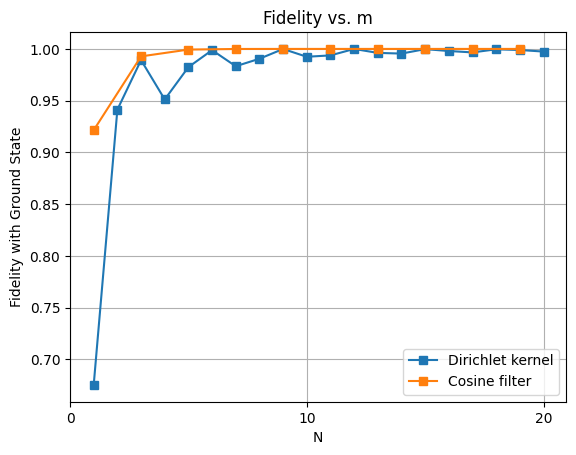

In [7]:
n = 1
dim = 2 ** n

def kron_n(op_list):
    result = np.array([[1]])
    for op in op_list:
        result = np.kron(result, op)
    return result

# TFIM Hamiltonian
H = np.zeros((dim, dim), dtype=np.complex128)
Z = np.array([[1, 0], [0, -1]])
X = np.array([[0, 1], [1, 0]])
I = np.eye(2)
H = 1/2 * (I + Z)


# 归一化并 shift
H_shifted = shift_and_normalize_H(H)
ground_state = get_ground_state(H_shifted)
init_state = np.ones(dim) / np.sqrt(dim)
def dirichlet_block_encoding(max_N):
    k_vals_full = np.arange(-max_N, max_N + 1)
    alpha_k = np.array([1/(2* max_N + 1) for k in k_vals_full])

    pad_len = 2 ** int(np.ceil(np.log2(len(alpha_k))))
    alpha_padded = np.zeros(pad_len)
    alpha_padded[:len(alpha_k)] = alpha_k
    weights = np.sqrt(alpha_padded / np.sum(alpha_padded))
    #weights = alpha_padded
    #print('weights:', weights)
    n_anc = int(np.log2(pad_len))
    ancilla_wires = list(range(n_anc))
    system_wires = list(range(n_anc, n_anc + n))
    U_list = [expm(-1.0j * k * H_shifted) for k in k_vals_full]
    U_list += [np.eye(dim)] * (pad_len - len(U_list))
    U_ops = [qml.QubitUnitary(U, wires=range(n_anc, n_anc + n)) for U in U_list]
    dev = qml.device("default.qubit", wires=n + n_anc)

    @qml.qnode(dev)
    def block_encoding():
        for i in system_wires:
            qml.Hadamard(i)
        # for i in range(n_anc, n+n_anc, 2):
        #     qml.X(i)
        qml.StatePrep(weights, wires=range(n_anc))
        qml.Select(U_ops, control=range(n_anc))
        qml.adjoint(qml.StatePrep)(weights, wires=range(n_anc))
        return qml.state()

    # U_be = qml.matrix(block_encoding, wire_order=list(range(n_anc)) + list(range(n_anc, n_anc + n)))()
    # A_block = U_be[:dim, :dim]
    # be_state = A_block @ init_state
    full_state = block_encoding()
    reshaped = full_state.reshape((2 ** n_anc, 2 ** n))
    system_state = reshaped[0, :]
    be_state = system_state

    success_prob = np.sum(np.abs(be_state) ** 2)
    be_state /= np.linalg.norm(be_state)
    fidelity = np.abs(np.vdot(be_state, ground_state)) ** 2
    return fidelity, success_prob


def fidelity_block_encoding(m):
    k_vals_full = np.arange(-m, m + 1)
    alpha_k_full = 2 ** (-2 * m) * np.array([math.comb(2 * m, m + k) for k in k_vals_full])
    keep = [i for i in range(len(alpha_k_full)) if alpha_k_full[i] > 1e-4]
    alpha_k = alpha_k_full[keep]
    k_vals = k_vals_full[keep]
    alpha_k /= np.sum(alpha_k)
    pad_len = 2 ** int(np.ceil(np.log2(len(alpha_k))))
    alpha_padded = np.zeros(pad_len)
    alpha_padded[:len(alpha_k)] = alpha_k
    weights = np.sqrt(alpha_padded / np.sum(alpha_padded))
    n_anc = int(np.log2(pad_len))
    ancilla_wires = list(range(n_anc))
    system_wires = list(range(n_anc, n_anc + n))
    U_list = [expm(2j * k * H_shifted) for k in k_vals]
    U_list += [np.eye(dim)] * (pad_len - len(U_list))
    U_ops = [qml.QubitUnitary(U, wires=range(n_anc, n_anc + n)) for U in U_list]
    dev = qml.device("default.qubit", wires=n + n_anc)

    @qml.qnode(dev)
    def block_encoding():
        for i in system_wires:
            qml.Hadamard(i)
        # for i in range(n_anc, n+n_anc, 2):
        #     qml.X(i)
        qml.StatePrep(weights, wires=range(n_anc))
        qml.Select(U_ops, control=range(n_anc))
        qml.adjoint(qml.StatePrep)(weights, wires=range(n_anc))
        return qml.state()

    # U_be = qml.matrix(block_encoding, wire_order=list(range(n_anc)) + list(range(n_anc, n_anc + n)))()
    # A_block = U_be[:dim, :dim]
    # be_state = A_block @ init_state
    full_state = block_encoding()
    reshaped = full_state.reshape((2 ** n_anc, 2 ** n))
    system_state = reshaped[0, :]
    be_state = system_state

    success_prob = np.sum(np.abs(be_state) ** 2)
    be_state /= np.linalg.norm(be_state)
    fidelity = np.abs(np.vdot(be_state, ground_state)) ** 2
    return fidelity, success_prob


# 扫描 m
max_N = 20#*5
m_vals = list(range(1, max_N + 1))
fidelity_cosine, success_cosine = zip(*[fidelity_block_encoding(m) for m in list(range(1, max_N//2 + 1))])

N_list = list(range(1, max_N + 1))
fidelity_be, success_be = zip(*[dirichlet_block_encoding(N) for N in N_list])
plt.plot(N_list, fidelity_be, marker='s', label='Dirichlet kernel')
plt.plot(list(range(1, max_N + 1, 2)), fidelity_cosine, marker='s', label='Cosine filter')
plt.xlabel("N")
plt.xticks(list(range(0, max_N + 1, 10)))
plt.ylabel("Fidelity with Ground State")
plt.title("Fidelity vs. m")
plt.legend()
plt.grid(True)
plt.show()

In [8]:
I+Z

array([[2., 0.],
       [0., 0.]])

In [15]:
# n = 1
# dim = 2 ** n
#
# def kron_n(op_list):
#     result = np.array([[1]])
#     for op in op_list:
#         result = np.kron(result, op)
#     return result
#
# # TFIM Hamiltonian
# H = np.zeros((dim, dim), dtype=np.complex128)
# Z = np.array([[1, 0], [0, -1]])
# X = np.array([[0, 1], [1, 0]])
# I = np.eye(2)
# H = 1/2 * (I + Z)

## TFIM hamiltonian
n = 4
dim = 2 ** n

def kron_n(op_list):
    result = np.array([[1]])
    for op in op_list:
        result = np.kron(result, op)
    return result

# TFIM Hamiltonian
H = np.zeros((dim, dim), dtype=np.complex128)
Z = np.array([[1, 0], [0, -1]])
X = np.array([[0, 1], [1, 0]])
I = np.eye(2)
for i in range(n):
    Zi = [I] * n
    Zi[i] = Z
    Zi[(i + 1) % n] = Z
    H -= kron_n(Zi)
    Xi = [I] * n
    Xi[i] = X
    H -= kron_n(Xi)

# 归一化并 shift
H_shifted = shift_and_normalize_H(H)
ground_state = get_ground_state(H_shifted)
init_state = np.ones(dim) / np.sqrt(dim)
def dirichlet_block_encoding(max_N):
    k_vals_full = np.arange(-max_N, max_N + 1)
    alpha_k = np.array([1/(2* max_N + 1) for k in k_vals_full])

    pad_len = 2 ** int(np.ceil(np.log2(len(alpha_k))))
    alpha_padded = np.zeros(pad_len)
    alpha_padded[:len(alpha_k)] = alpha_k
    weights = np.sqrt(alpha_padded / np.sum(alpha_padded))
    #weights = alpha_padded
    #print('weights:', weights)
    n_anc = int(np.log2(pad_len))
    ancilla_wires = list(range(n_anc))
    system_wires = list(range(n_anc, n_anc + n))
    U_list = [expm(-1.0j * k * H_shifted) for k in k_vals_full]
    U_list += [np.eye(dim)] * (pad_len - len(U_list))
    U_ops = [qml.QubitUnitary(U, wires=range(n_anc, n_anc + n)) for U in U_list]
    dev = qml.device("default.qubit", wires=n + n_anc)

    @qml.qnode(dev)
    def block_encoding():
        # for i in system_wires:
        #     qml.Hadamard(i)
        # for i in range(n_anc, n+n_anc, 2):
        #     qml.X(i)
        qml.StatePrep(weights, wires=range(n_anc))
        qml.Select(U_ops, control=range(n_anc))
        qml.adjoint(qml.StatePrep)(weights, wires=range(n_anc))
        return qml.state()

    U_be = qml.matrix(block_encoding, wire_order=list(range(n_anc)) + list(range(n_anc, n_anc + n)))()
    A_block = U_be[:dim, :dim]
    return A_block

def custom_filter_matrix(H, N):
    return sum(expm(-1j * H * i) for i in range(-N, N + 1)) / (2*N+1)  # corrected j = N+1 to 2N

result_a = dirichlet_block_encoding(max_N)
result_b = custom_filter_matrix(H_shifted, max_N)
np.allclose(result_a, result_b)


True

In [16]:
print(result_a)

[[ 0.7076593 -5.20417043e-17j  0.18755439-3.46944695e-17j
   0.18755439-3.46944695e-17j  0.08680684+6.93889390e-18j
   0.18755439-2.42861287e-17j  0.04555348+5.20417043e-18j
   0.08680684-3.46944695e-18j  0.01853736+2.14672030e-17j
   0.18755439-2.42861287e-17j  0.08680684-1.04083409e-17j
   0.04555348+9.54097912e-18j  0.01853736+2.22803546e-17j
   0.08680684-6.93889390e-18j  0.01853736+2.05998413e-17j
   0.01853736+2.54245409e-17j -0.05395969+1.38777878e-17j]
 [ 0.18755439-2.08166817e-17j  0.03653509+1.56125113e-17j
   0.04353279+1.73472348e-17j  0.00812517+0.00000000e+00j
   0.05300823+8.67361738e-18j  0.01577901-3.29597460e-17j
   0.0243529 -8.67361738e-18j  0.04149145-3.64291930e-17j
   0.04353279+1.73472348e-17j  0.00812517+6.93889390e-18j
   0.00809884-3.46944695e-18j  0.03201601-1.38777878e-17j
   0.0243529 -1.73472348e-18j  0.04149145-3.81639165e-17j
  -0.02394088+0.00000000e+00j  0.01853736+1.70761842e-17j]
 [ 0.18755439-1.04083409e-17j  0.04353279+1.73472348e-17j
   0.0365350

In [17]:
print(result_b)

[[ 0.7076593 +1.55702010e-17j  0.18755439+0.00000000e+00j
   0.18755439+2.03089578e-18j  0.08680684+2.03089578e-18j
   0.18755439-2.03089578e-18j  0.04555348+1.22699953e-18j
   0.08680684+2.03089578e-18j  0.01853736+1.35393052e-18j
   0.18755439+8.12358311e-18j  0.08680684+3.72330892e-18j
   0.04555348+2.53861972e-19j  0.01853736+6.76965259e-19j
   0.08680684-2.03089578e-18j  0.01853736+6.76965259e-19j
   0.01853736+1.35393052e-18j -0.05395969+2.70786104e-18j]
 [ 0.18755439+0.00000000e+00j  0.03653509+1.30315812e-17j
   0.04353279-1.69241315e-18j  0.00812517+2.70786104e-18j
   0.05300823+6.76965259e-19j  0.01577901-5.92344602e-19j
   0.0243529 +8.46206574e-19j  0.04149145+0.00000000e+00j
   0.04353279-1.69241315e-18j  0.00812517+2.70786104e-18j
   0.00809884-1.35393052e-18j  0.03201601-2.70786104e-18j
   0.0243529 +3.46944695e-18j  0.04149145+0.00000000e+00j
  -0.02394088-4.06179155e-18j  0.01853736-6.76965259e-19j]
 [ 0.18755439+4.06179155e-18j  0.04353279-3.04634367e-18j
   0.0365350

In [9]:
def shift_and_normalize_H_adjust(H):
    eigvals = np.linalg.eigvalsh(H)
    λ_min, λ_max = np.min(eigvals), np.max(eigvals)
    H_norm = (H - λ_min * np.eye(len(H))) / (λ_max - λ_min)
    #λ0 = np.min(np.linalg.eigvalsh(H_norm))
    #H_shifted = H_norm - λ0 * np.eye(len(H))
    return H_norm*2.5

n = 1
dim = 2 ** n

def kron_n(op_list):
    result = np.array([[1]])
    for op in op_list:
        result = np.kron(result, op)
    return result

# TFIM Hamiltonian
H = np.zeros((dim, dim), dtype=np.complex128)
Z = np.array([[1, 0], [0, -1]])
X = np.array([[0, 1], [1, 0]])
I = np.eye(2)
H =  1/2 * (I + Z)


# 归一化并 shift
H_shifted_dirichlet = shift_and_normalize_H_adjust(H)
H_shifted_cos = shift_and_normalize_H(H)
ground_state = get_ground_state(H)
init_state = np.ones(dim) / np.sqrt(dim)
def dirichlet_block_encoding(max_N):
    k_vals_full = np.arange(-max_N, max_N + 1)
    alpha_k = np.array([1/(2* max_N + 1) for k in k_vals_full])

    pad_len = 2 ** int(np.ceil(np.log2(len(alpha_k))))
    alpha_padded = np.zeros(pad_len)
    alpha_padded[:len(alpha_k)] = alpha_k
    weights = np.sqrt(alpha_padded / np.sum(alpha_padded))
    #weights = alpha_padded
    #print('weights:', weights)
    n_anc = int(np.log2(pad_len))
    ancilla_wires = list(range(n_anc))
    system_wires = list(range(n_anc, n_anc + n))
    U_list = [expm(-1.0j * k * H_shifted_dirichlet) for k in k_vals_full]
    U_list += [np.eye(dim)] * (pad_len - len(U_list))
    U_ops = [qml.QubitUnitary(U, wires=range(n_anc, n_anc + n)) for U in U_list]
    dev = qml.device("default.qubit", wires=n + n_anc)

    @qml.qnode(dev)
    def block_encoding():
        for i in system_wires:
            qml.Hadamard(i)
        # for i in range(n_anc, n+n_anc, 2):
        #     qml.X(i)
        qml.StatePrep(weights, wires=range(n_anc))
        qml.Select(U_ops, control=range(n_anc))
        qml.adjoint(qml.StatePrep)(weights, wires=range(n_anc))
        return qml.state()

    # U_be = qml.matrix(block_encoding, wire_order=list(range(n_anc)) + list(range(n_anc, n_anc + n)))()
    # A_block = U_be[:dim, :dim]
    # be_state = A_block @ init_state
    full_state = block_encoding()
    reshaped = full_state.reshape((2 ** n_anc, 2 ** n))
    system_state = reshaped[0, :]
    be_state = system_state

    success_prob = np.sum(np.abs(be_state) ** 2)
    be_state /= np.linalg.norm(be_state)
    fidelity = np.abs(np.vdot(be_state, ground_state)) ** 2
    return fidelity, success_prob


def fidelity_block_encoding(m):
    k_vals_full = np.arange(-m, m + 1)
    alpha_k_full = 2 ** (-2 * m) * np.array([math.comb(2 * m, m + k) for k in k_vals_full])
    keep = [i for i in range(len(alpha_k_full)) if alpha_k_full[i] > 1e-4]
    alpha_k = alpha_k_full[keep]
    k_vals = k_vals_full[keep]
    alpha_k /= np.sum(alpha_k)
    pad_len = 2 ** int(np.ceil(np.log2(len(alpha_k))))
    alpha_padded = np.zeros(pad_len)
    alpha_padded[:len(alpha_k)] = alpha_k
    weights = np.sqrt(alpha_padded / np.sum(alpha_padded))
    n_anc = int(np.log2(pad_len))
    ancilla_wires = list(range(n_anc))
    system_wires = list(range(n_anc, n_anc + n))
    U_list = [expm(2j * k * H_shifted_cos) for k in k_vals]
    U_list += [np.eye(dim)] * (pad_len - len(U_list))
    U_ops = [qml.QubitUnitary(U, wires=range(n_anc, n_anc + n)) for U in U_list]
    dev = qml.device("default.qubit", wires=n + n_anc)

    @qml.qnode(dev)
    def block_encoding():
        for i in system_wires:
            qml.Hadamard(i)
        # for i in range(n_anc, n+n_anc, 2):
        #     qml.X(i)
        qml.StatePrep(weights, wires=range(n_anc))
        qml.Select(U_ops, control=range(n_anc))
        qml.adjoint(qml.StatePrep)(weights, wires=range(n_anc))
        return qml.state()

    # U_be = qml.matrix(block_encoding, wire_order=list(range(n_anc)) + list(range(n_anc, n_anc + n)))()
    # A_block = U_be[:dim, :dim]
    # be_state = A_block @ init_state
    full_state = block_encoding()
    reshaped = full_state.reshape((2 ** n_anc, 2 ** n))
    system_state = reshaped[0, :]
    be_state = system_state

    success_prob = np.sum(np.abs(be_state) ** 2)
    be_state /= np.linalg.norm(be_state)
    fidelity = np.abs(np.vdot(be_state, ground_state)) ** 2
    return fidelity, success_prob


# 扫描 m
max_N = 20#*5
m_vals = list(range(0, max_N + 1))
fidelity_cosine, success_cosine = zip(*[fidelity_block_encoding(m) for m in list(range(0, max_N//2 + 1))])

N_list = list(range(0, max_N + 1))
fidelity_be, success_be = zip(*[dirichlet_block_encoding(N) for N in N_list])
plt.plot(N_list, fidelity_be, marker='s', label='Dirichlet kernel')
plt.plot(list(range(0, max_N + 1, 2)), fidelity_cosine, marker='s', label='Cosine filter')
plt.xlabel("N")
plt.xticks(list(range(0, max_N + 1, 10)))
plt.ylabel("Fidelity with Ground State")
plt.title("Fidelity vs. m")
plt.legend()
plt.grid(True)
plt.show()


NameError: name 'shift_and_normalize_H' is not defined

In [20]:
def shift_and_normalize_H_adjust(H):
    eigvals = np.linalg.eigvalsh(H)
    λ_min, λ_max = np.min(eigvals), np.max(eigvals)
    H_norm = (H - λ_min * np.eye(len(H))) / (λ_max - λ_min)
    λ0 = np.min(np.linalg.eigvalsh(H_norm))
    print('[lambda 0 is]', λ0)
    H_shifted = H_norm - λ0 * np.eye(len(H))
    return H_shifted/10

H = np.zeros((dim, dim), dtype=np.complex128)
Z = np.array([[1, 0], [0, -1]])
X = np.array([[0, 1], [1, 0]])
I = np.eye(2)
H = 1/2 * (I + Z)
shift_and_normalize_H_adjust(H)

[lambda 0 is] 0.0


array([[0.1, 0. ],
       [0. , 0. ]])

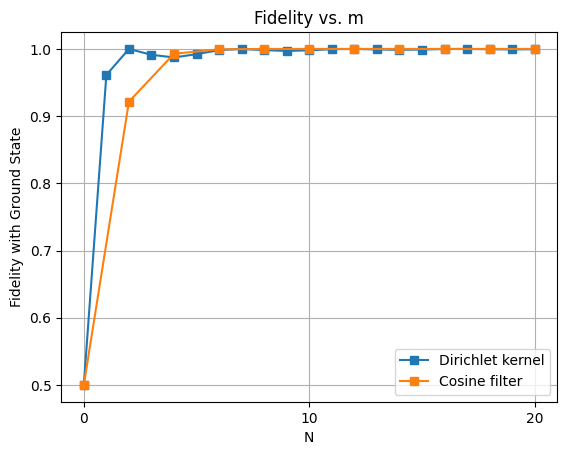

In [36]:
def dirichlet_block_encoding(N):
    # 退化情形：N=0 => A = I，无需 ancilla 和 Select
    if N == 0:
        dev = qml.device("default.qubit", wires=n)

        @qml.qnode(dev)
        def circuit_no_anc():
            # 你的初态做法：系统位上先做 Hadamard
            for i in range(n):
                qml.Hadamard(i)
            # A = I，不再做任何事
            return qml.state()

        be_state = circuit_no_anc()
        success_prob = 1.0
        be_state = be_state / np.linalg.norm(be_state)
        fidelity = np.abs(np.vdot(be_state, ground_state)) ** 2
        return fidelity, success_prob

    # 正常情形：N >= 1
    k_vals_full = np.arange(-N, N + 1)
    alpha_k = np.full_like(k_vals_full, 1.0, dtype=np.float64) / (2 * N + 1)

    pad_len = 2 ** int(np.ceil(np.log2(len(alpha_k))))
    alpha_padded = np.zeros(pad_len, dtype=np.float64)
    alpha_padded[:len(alpha_k)] = alpha_k
    weights = np.sqrt(alpha_padded / np.sum(alpha_padded))

    n_anc = int(np.log2(pad_len))
    system_wires = list(range(n_anc, n_anc + n))

    U_list = [expm(-1.0j * k * H_shifted_dirichlet) for k in k_vals_full]
    U_list += [np.eye(dim)] * (pad_len - len(U_list))
    U_ops = [qml.QubitUnitary(U, wires=system_wires) for U in U_list]

    dev = qml.device("default.qubit", wires=n + n_anc)

    @qml.qnode(dev)
    def block_encoding():
        for i in system_wires:
            qml.Hadamard(i)
        qml.StatePrep(weights, wires=range(n_anc))
        qml.Select(U_ops, control=range(n_anc))
        qml.adjoint(qml.StatePrep)(weights, wires=range(n_anc))
        return qml.state()

    full_state = block_encoding()
    reshaped = full_state.reshape((2 ** n_anc, 2 ** n))
    system_state = reshaped[0, :]
    be_state = system_state

    success_prob = float(np.sum(np.abs(be_state) ** 2))
    be_state /= np.linalg.norm(be_state)
    fidelity = float(np.abs(np.vdot(be_state, ground_state)) ** 2)
    return fidelity, success_prob


def fidelity_block_encoding(m):
    # 退化情形：m=0 => cos^{0}(H)=I，无需 ancilla 和 Select
    if m == 0:
        dev = qml.device("default.qubit", wires=n)

        @qml.qnode(dev)
        def circuit_no_anc():
            for i in range(n):
                qml.Hadamard(i)
            # A = I
            return qml.state()

        be_state = circuit_no_anc()
        success_prob = 1.0
        be_state = be_state / np.linalg.norm(be_state)
        fidelity = np.abs(np.vdot(be_state, ground_state)) ** 2
        return fidelity, success_prob

    # 正常情形：m >= 1
    k_vals_full = np.arange(-m, m + 1)
    alpha_k_full = (2.0 ** (-2 * m)) * np.array([math.comb(2 * m, m + k) for k in k_vals_full], dtype=np.float64)

    keep = [i for i in range(len(alpha_k_full)) if alpha_k_full[i] > 1e-4]
    alpha_k = alpha_k_full[keep].astype(np.float64)
    k_vals = k_vals_full[keep]
    alpha_k /= alpha_k.sum()

    pad_len = 2 ** int(np.ceil(np.log2(len(alpha_k))))
    alpha_padded = np.zeros(pad_len, dtype=np.float64)
    alpha_padded[:len(alpha_k)] = alpha_k
    weights = np.sqrt(alpha_padded / np.sum(alpha_padded))

    n_anc = int(np.log2(pad_len))
    system_wires = list(range(n_anc, n_anc + n))

    # 注意：这里沿用你原来的  exp(2j k H_shifted_cos)
    U_list = [expm(2j * k * H_shifted_cos) for k in k_vals]
    U_list += [np.eye(dim)] * (pad_len - len(U_list))
    U_ops = [qml.QubitUnitary(U, wires=system_wires) for U in U_list]

    dev = qml.device("default.qubit", wires=n + n_anc)

    @qml.qnode(dev)
    def block_encoding():
        for i in system_wires:
            qml.Hadamard(i)
        qml.StatePrep(weights, wires=range(n_anc))
        qml.Select(U_ops, control=range(n_anc))
        qml.adjoint(qml.StatePrep)(weights, wires=range(n_anc))
        return qml.state()

    full_state = block_encoding()
    reshaped = full_state.reshape((2 ** n_anc, 2 ** n))
    system_state = reshaped[0, :]
    be_state = system_state

    success_prob = float(np.sum(np.abs(be_state) ** 2))
    be_state /= np.linalg.norm(be_state)
    fidelity = float(np.abs(np.vdot(be_state, ground_state)) ** 2)
    return fidelity, success_prob


# 扫描 m
max_N = 20#*5
m_vals = list(range(0, max_N + 1))
fidelity_cosine, success_cosine = zip(*[fidelity_block_encoding(m) for m in list(range(0, max_N//2 + 1))])

N_list = list(range(0, max_N + 1))
fidelity_be, success_be = zip(*[dirichlet_block_encoding(N) for N in N_list])
plt.plot(N_list, fidelity_be, marker='s', label='Dirichlet kernel')
plt.plot(list(range(0, max_N + 1, 2)), fidelity_cosine, marker='s', label='Cosine filter')
plt.xlabel("N")
plt.xticks(list(range(0, max_N + 1, 10)))
plt.ylabel("Fidelity with Ground State")
plt.title("Fidelity vs. m")
plt.legend()
plt.grid(True)
plt.show()

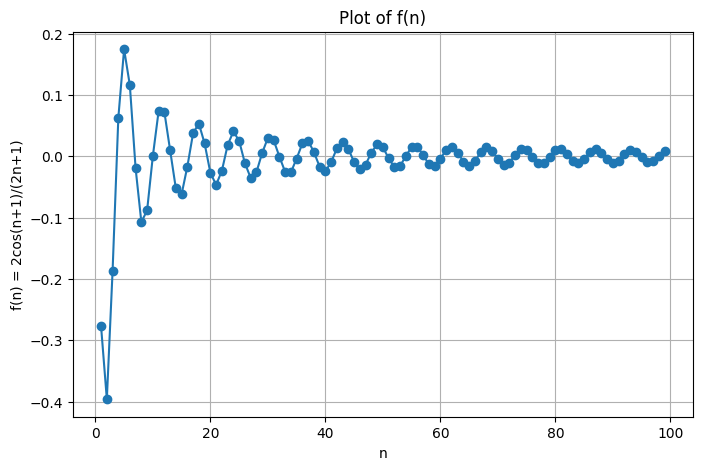

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 定义函数
def f(n):
    return 2 * np.cos(n + 1) / (2 * n + 1)

# 取 n 的范围
n_vals = np.arange(1, 100)  # 从1到99
y_vals = f(n_vals)

# 作图
plt.figure(figsize=(8,5))
plt.plot(n_vals, y_vals, marker='o')
plt.xlabel("n")
plt.ylabel("f(n) = 2cos(n+1)/(2n+1)")
plt.title("Plot of f(n)")
plt.grid(True)
plt.show()


In [37]:
temp_a = [-1, 2, 0, 1, 2]
temp_b = 2
temp_c = 3
sum([temp_b* i for i in temp_a])


8

In [38]:
sum([temp_c* i for i in temp_a])

12

In [39]:
sum([5* i for i in temp_a])

20

In [5]:
import numpy as np

def f(x, N):
    return np.sin((N+0.5)*x) / np.sin(x/2)

x_vals = np.linspace(0.01, 6*np.pi, 1000)
y1 = f(x_vals, N=3)
y2 = f(x_vals + 2*np.pi, N=3)

print(np.allclose(y1, y2, atol=1e-8))  # True 表示周期确实是 2π


False


In [6]:
import numpy as np

def f(x, N):
    return np.sin((N + 0.5) * x) / np.sin(x / 2)

N = 3  # N 必须是整数（Dirichlet kernel）
eps = 1e-9

# 采样区间，注意避开 2πk 的极点
x = np.linspace(0, 6*np.pi, 20001)
mask = np.abs(np.sin(x/2)) > eps
x1 = x[mask]

y1 = f(x1, N)
y2 = f(x1 + 2*np.pi, N)

print("allclose =", np.allclose(y1, y2, atol=1e-9, rtol=1e-9))
print("max |diff| =", np.max(np.abs(y1 - y2)))



allclose = True
max |diff| = 2.261746345766369e-11


In [4]:
print('y2 is', y2)

y2 is [ 6.99860008e+00  6.98834635e+00  6.96816577e+00  6.93810856e+00
  6.89824948e+00  6.84868762e+00  6.78954614e+00  6.72097187e+00
  6.64313493e+00  6.55622821e+00  6.46046685e+00  6.35608757e+00
  6.24334804e+00  6.12252611e+00  5.99391905e+00  5.85784263e+00
  5.71463028e+00  5.56463213e+00  5.40821396e+00  5.24575621e+00
  5.07765288e+00  4.90431037e+00  4.72614640e+00  4.54358874e+00
  4.35707407e+00  4.16704670e+00  3.97395731e+00  3.77826174e+00
  3.58041961e+00  3.38089314e+00  3.18014576e+00  2.97864089e+00
  2.77684058e+00  2.57520431e+00  2.37418764e+00  2.17424102e+00
  1.97580851e+00  1.77932658e+00  1.58522293e+00  1.39391535e+00
  1.20581055e+00  1.02130310e+00  8.40774426e-01  6.64591719e-01
  4.93107051e-01  3.26656434e-01  1.65558971e-01  1.01160501e-02
 -1.39389400e-01 -2.82693602e-01 -4.19552555e-01 -5.49742605e-01
 -6.73060948e-01 -7.89326067e-01 -8.98378105e-01 -1.00007917e+00
 -1.09431359e+00 -1.18098804e+00 -1.26003169e+00 -1.33139623e+00
 -1.39505581e+00 -1

In [7]:
2*np.pi/3

2.0943951023931953

In [8]:
np.pi/30.5

0.10300303782261616

In [10]:
4*np.pi/3

4.1887902047863905